In [1]:
from haplogone import VCF

In [2]:
sample = VCF("../../bioinf_semester_project/data/sample_2.vcf")
sample.read().count_baf().segment_baf()
sample

VCF(
	input_file='../../bioinf_semester_project/data/sample_2.vcf',
	path_to_centromeres_file='centromeres.bed',
	segment_size_threshold=1000000.0,
	segmentation_shuffles=1000,
	segmentation_p=0.01,
	validation_shuffles=1000,
	validation_p=0.01
)

In [3]:
sample.vcf

#CHROM    POS ID REF ALT     QUAL FILTER  DP    ADF    ADR  ...  \
0        chr1  15118  .   A   G    27.56      .  78    5,5  33,35  ...   
1        chr1  15211  .   T   G   9.8017      .  50    2,5  15,28  ...   
2        chr1  15274  .   A   T   19.468      .  15    0,4   0,10  ...   
3        chr1  16378  .   T   C  25.3857      .  23    5,2   4,12  ...   
4        chr1  16495  .   G   C  13.2653      .  43  24,16    3,0  ...   
...       ...    ... ..  ..  ..      ...    ...  ..    ...    ...  ...   
142214   chrM  14766  .   C   T  225.417      .  10    0,8    0,2  ...   
142215   chrM  14905  .   G   A  179.416      .  11   0,10    0,1  ...   
142216   chrM  16189  .   T   C  198.938      .  11    0,7    0,3  ...   
142217   chrM  16294  .   C   T  225.417      .  12    0,5    0,7  ...   
142218   chrM  16519  .   T   C  225.417      .  16    0,2   0,14  ...   

              DP4  MQ   GT         PL  SP INDEL  IDV  IMF       BAF  \
0       5,33,5,35   3  0/1     58,0,6   0   NaN  NaN  NaN  0.512821   
1       2,15,5,28   8  0/1    42,0,93   0   NaN  NaN  NaN  0.660000   
2        0,0,4,11   2  1/1    49,42,0   0   NaN  NaN  NaN  1.000000   
3        5,4,2,12  12  0/1    58,0,61  12   NaN  NaN  NaN  1.000000   
4       24,3,16,0  17  0/1   46,0,127   5   NaN  NaN  NaN  0.627907   
...           ...  ..  ...        ...  ..   ...  ...  ...       ...   
142214    0,0,8,2  60  1/1   255,30,0   0   NaN  NaN  NaN  1.000000   
142215   0,0,10,1  60  1/1   209,33,0   0   NaN  NaN  NaN  1.000000   
142216    0,0,8,3  60  1/1  255,57,27   0   NaN  NaN  NaN  1.000000   
142217    0,0,5,7  60  1/1   255,36,0   0   NaN  NaN  NaN  1.000000   
142218   0,0,2,14  53  1/1   255,48,0   0   NaN  NaN  NaN  1.000000   

       BAF_segment  
0          0.89824  
1          0.89824  
2          0.89824  
3          0.89824  
4          0.89824  
...            ...  
142214     1.00000  
142215     1.00000  
142216     1.00000  
142217     1.00000  
142218     1.00000  

[142219 rows x 31 columns]

In [4]:
sample.create_bed()

#chrom  chromStart   chromEnd name
0    chrM         263      16519  LOH
1    chrX      361600   55146015  LOH
2   chr16     1345533    1509487  LOH
3    chr1     2477921    3480851  LOH
4    chr4     2931544    3415024  LOH
..    ...         ...        ...  ...
89   chr1   197129013  200048458  LOH
90   chr1   201135461  202729522  LOH
91   chr2   201478014  208145545  LOH
92   chr1   209608998  210684141  LOH
93   chr2   214976105  216259235  LOH

[94 rows x 4 columns]

/home/alex/dev/HaploGone/code/haplogone.py:129: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(15, 10))


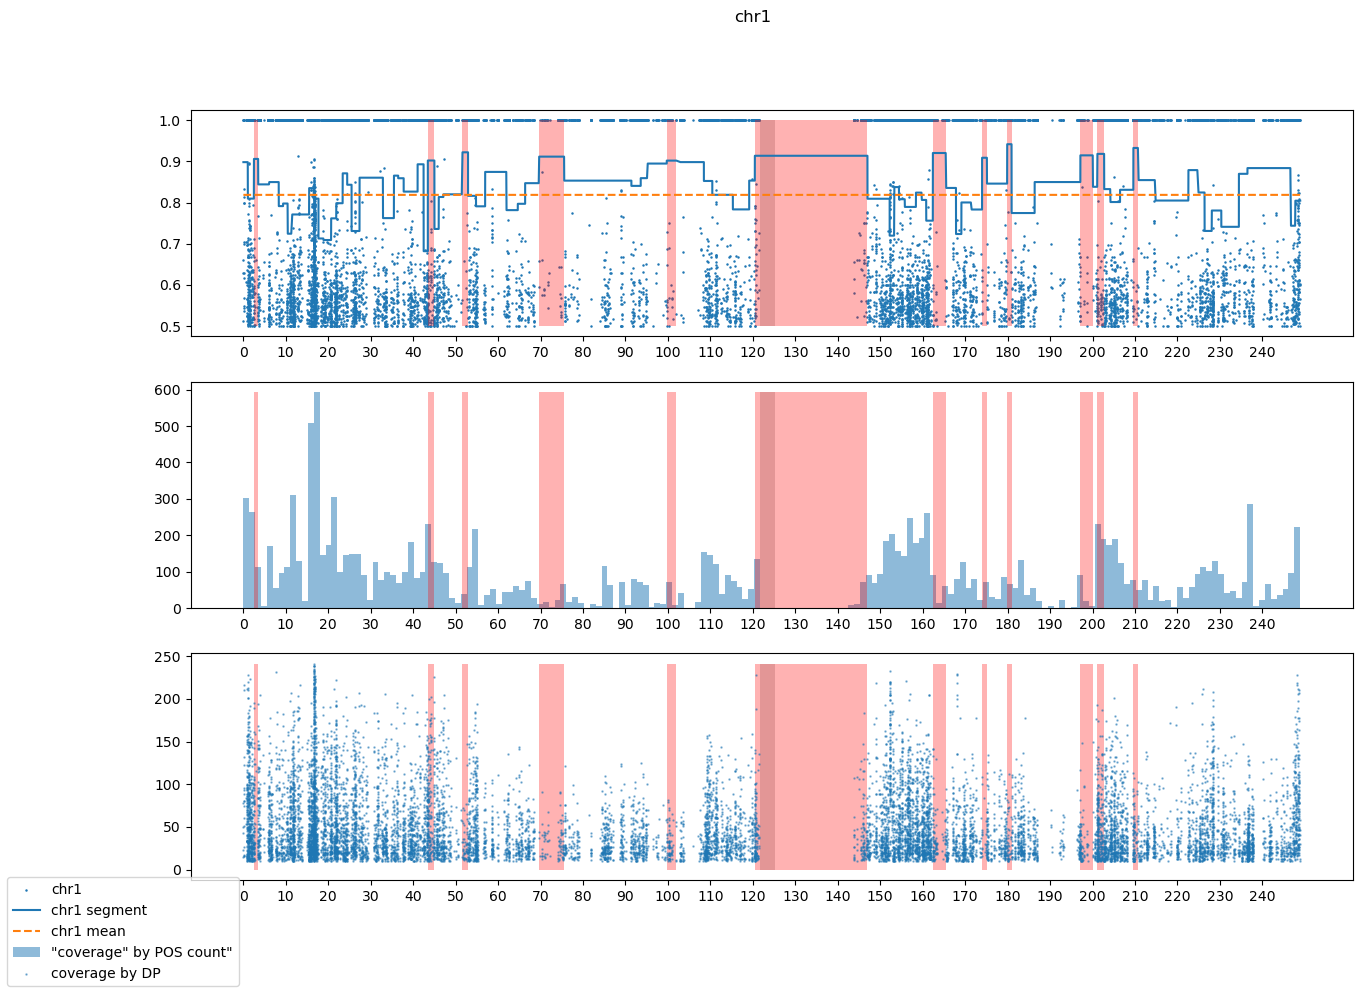

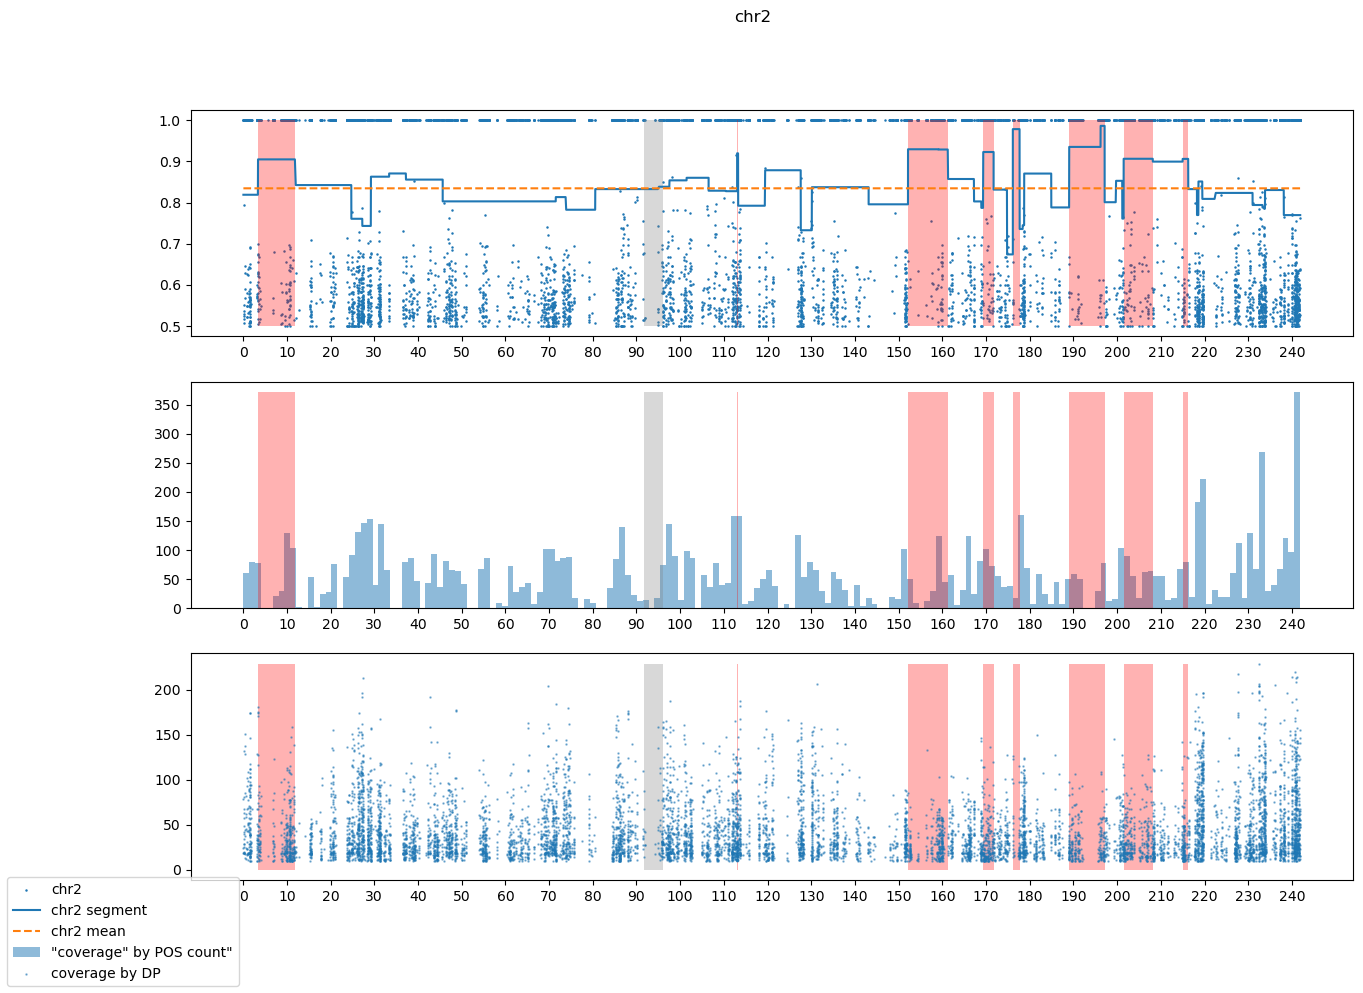

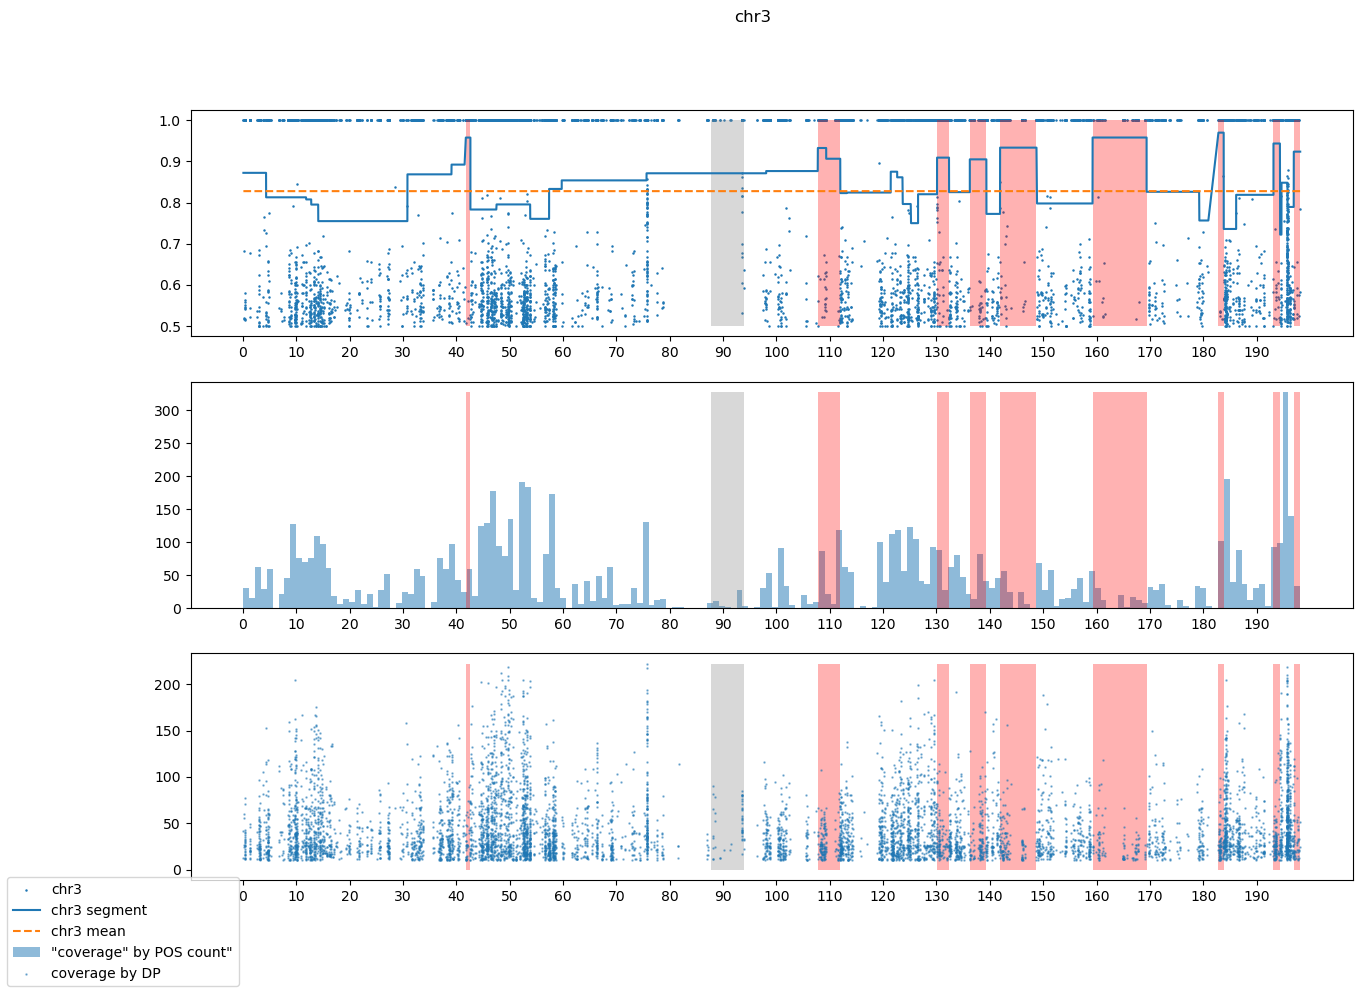

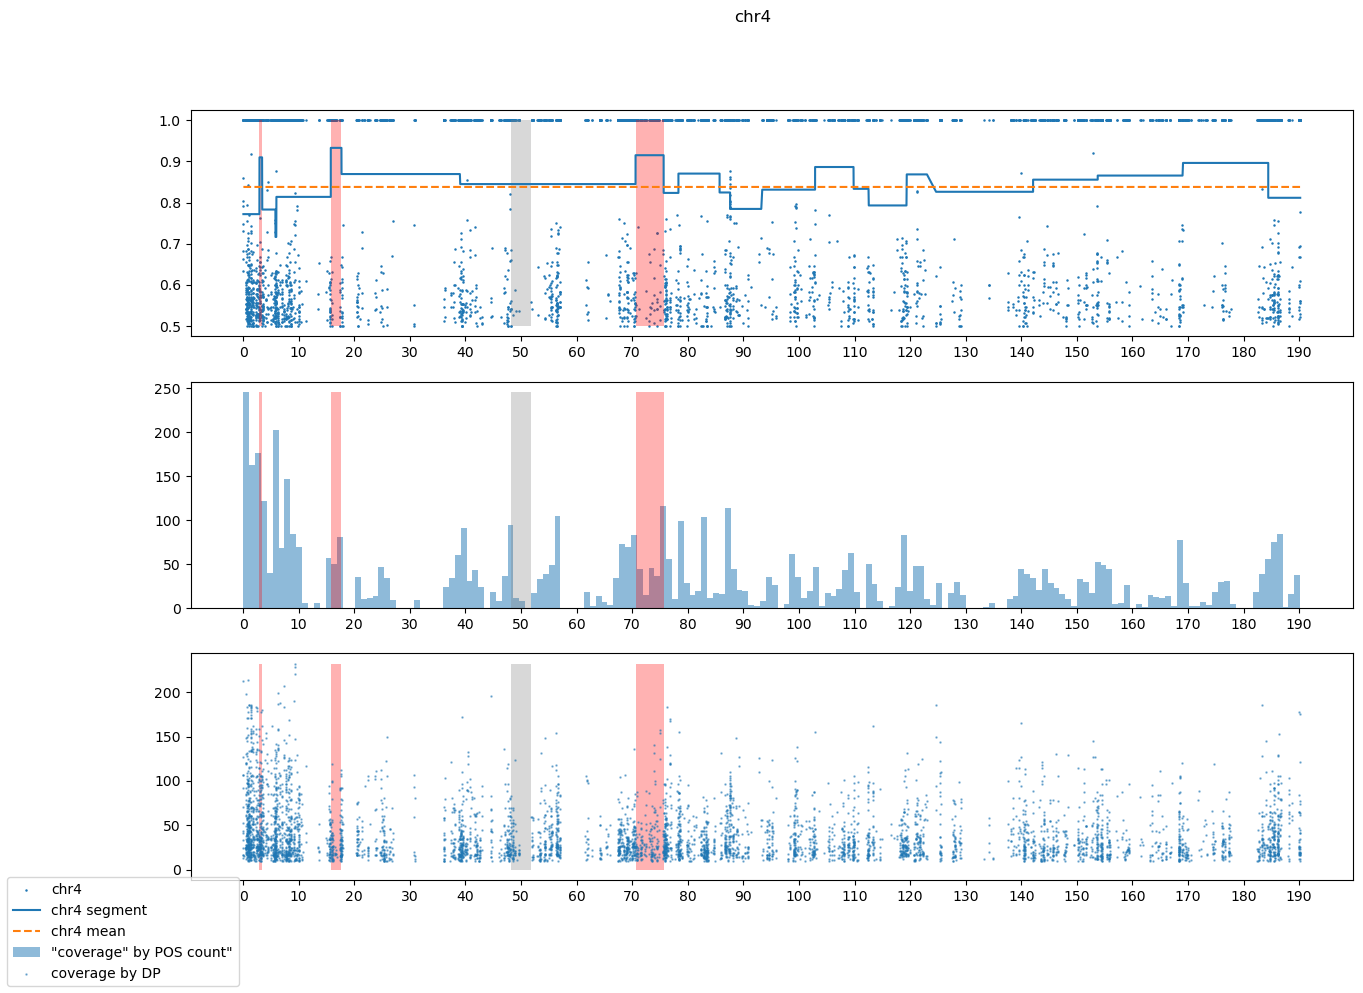

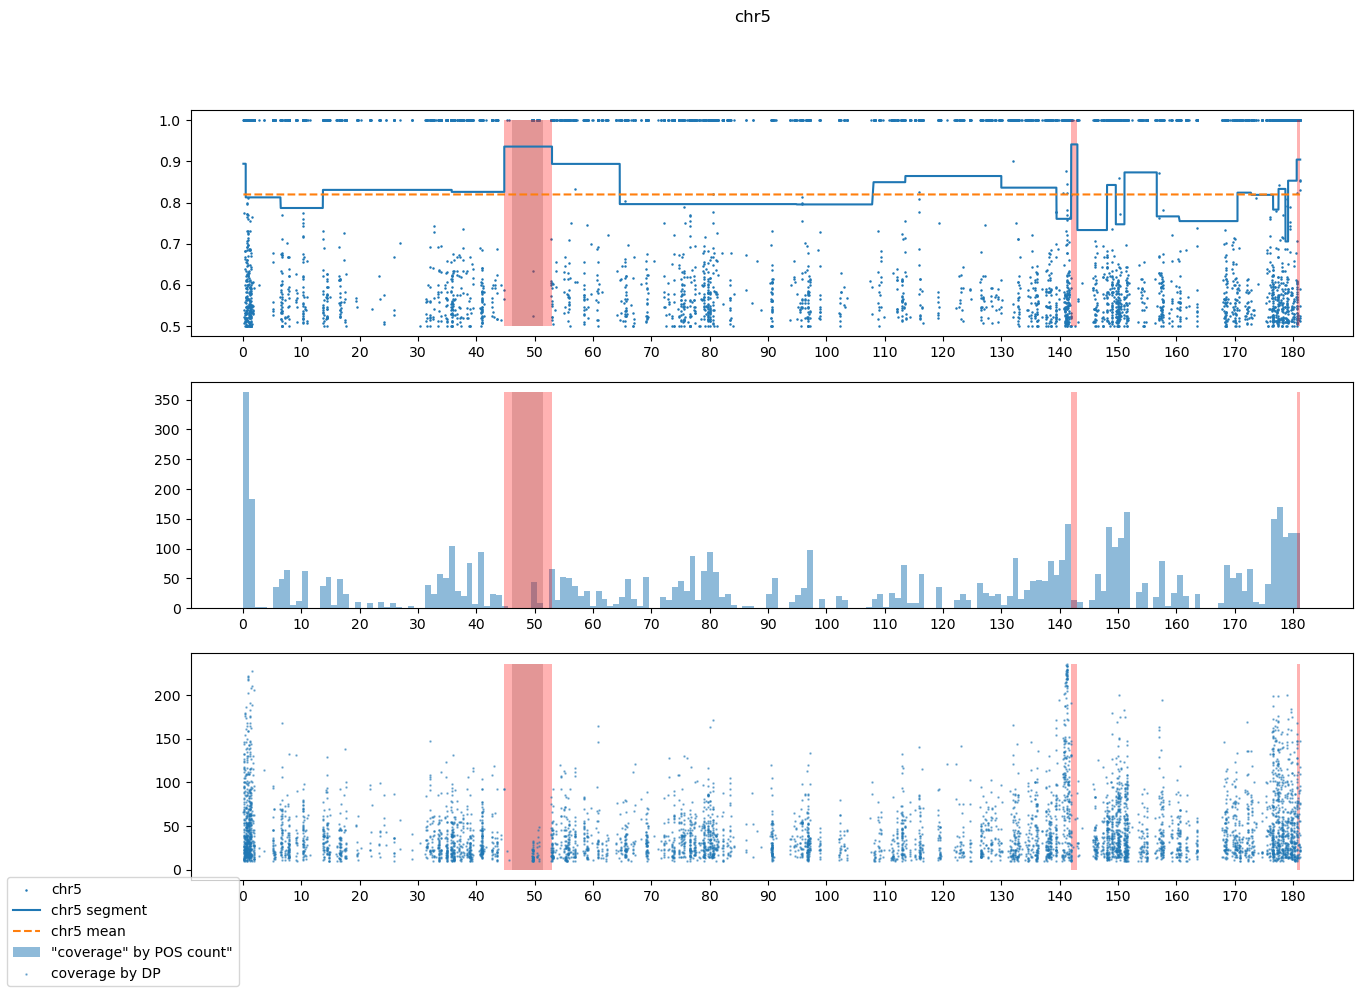

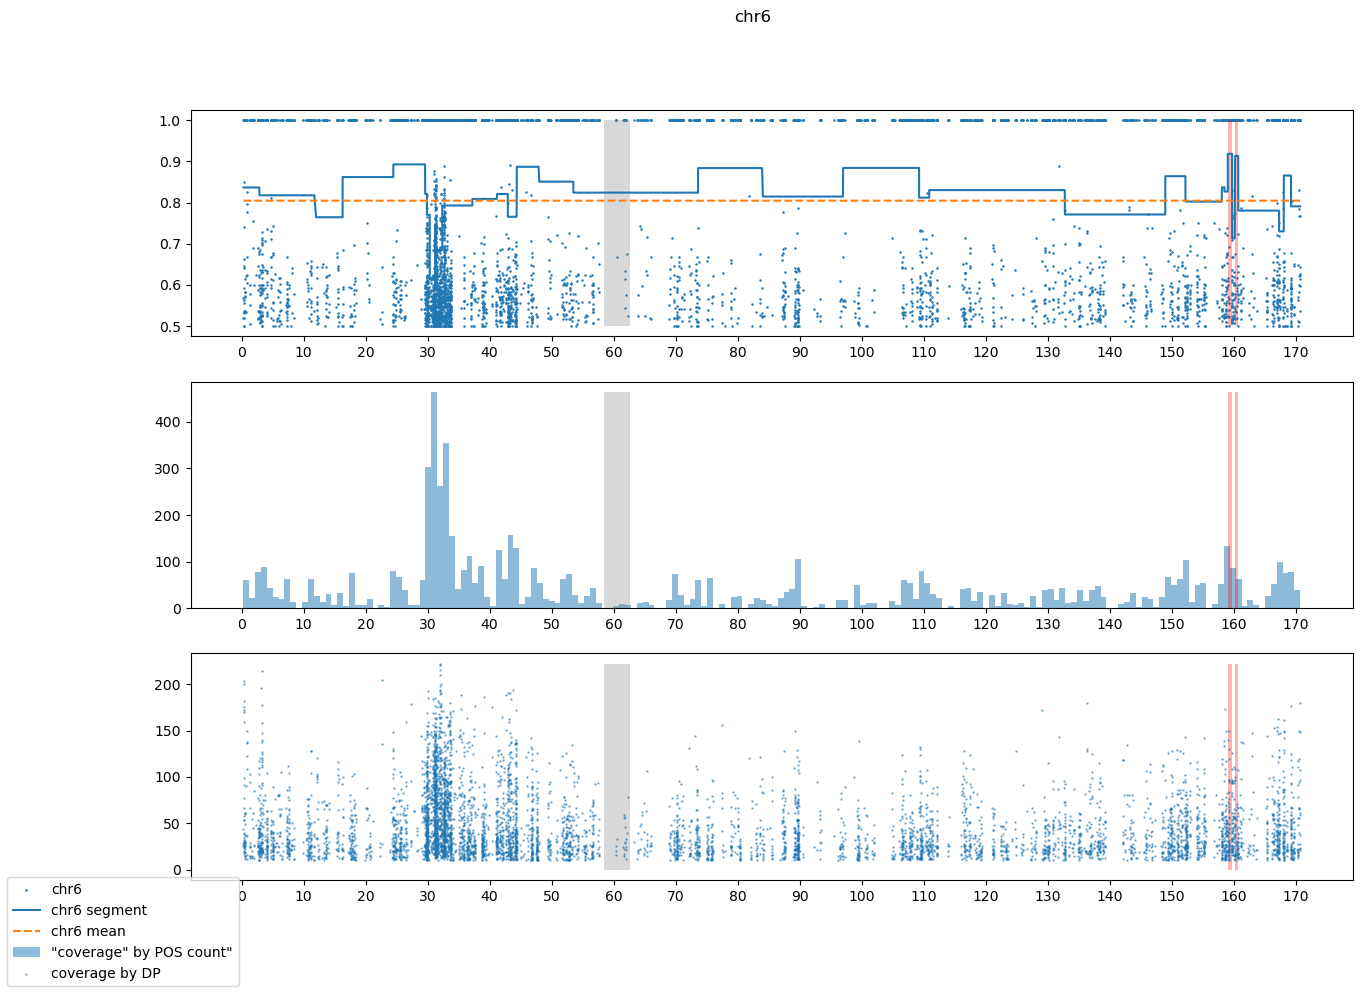

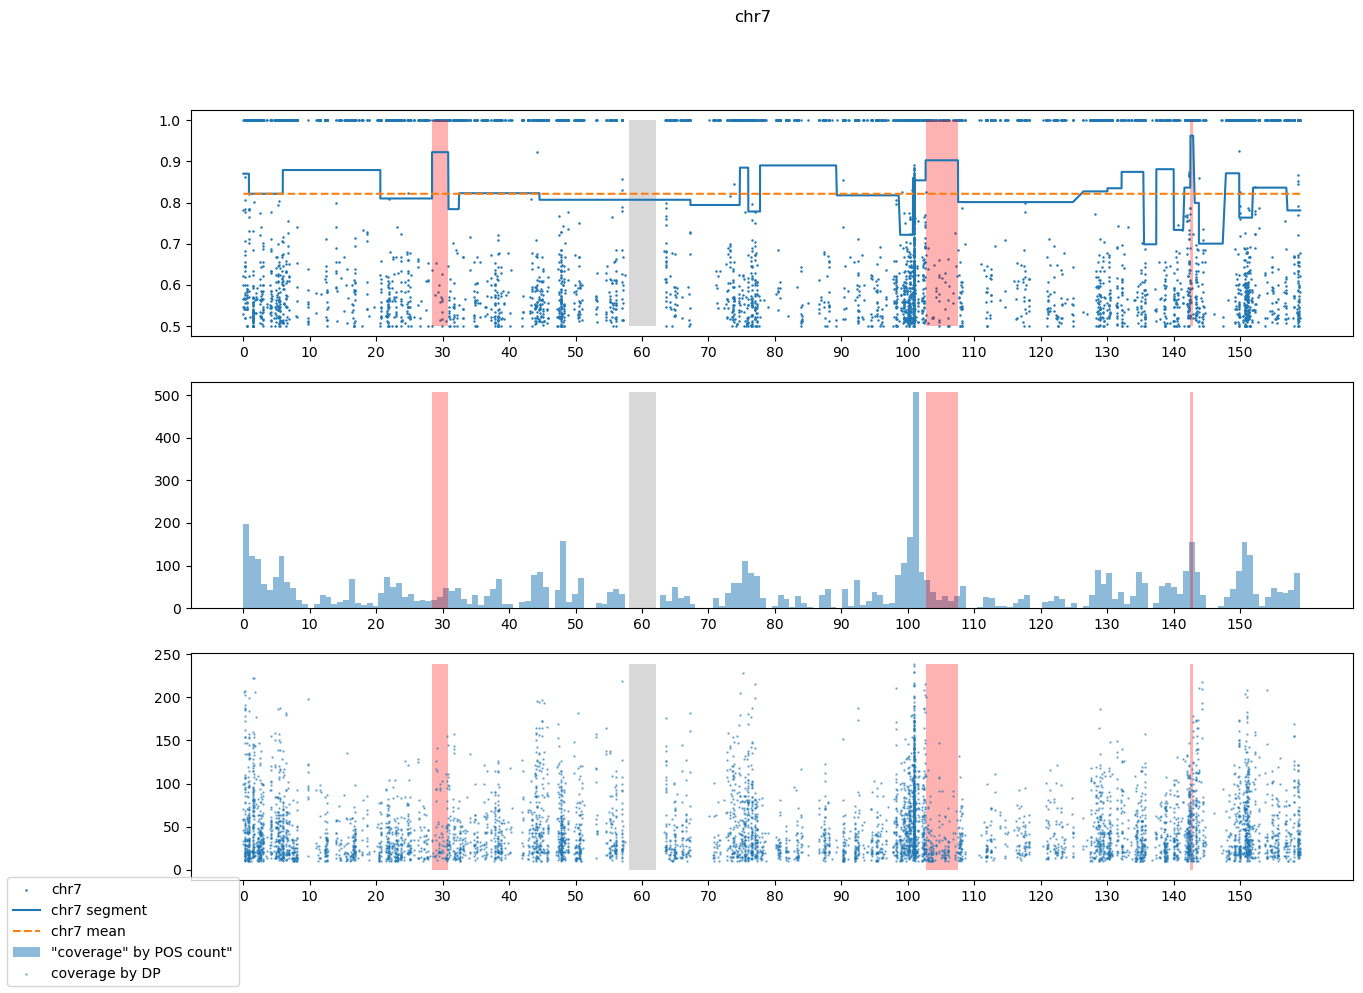

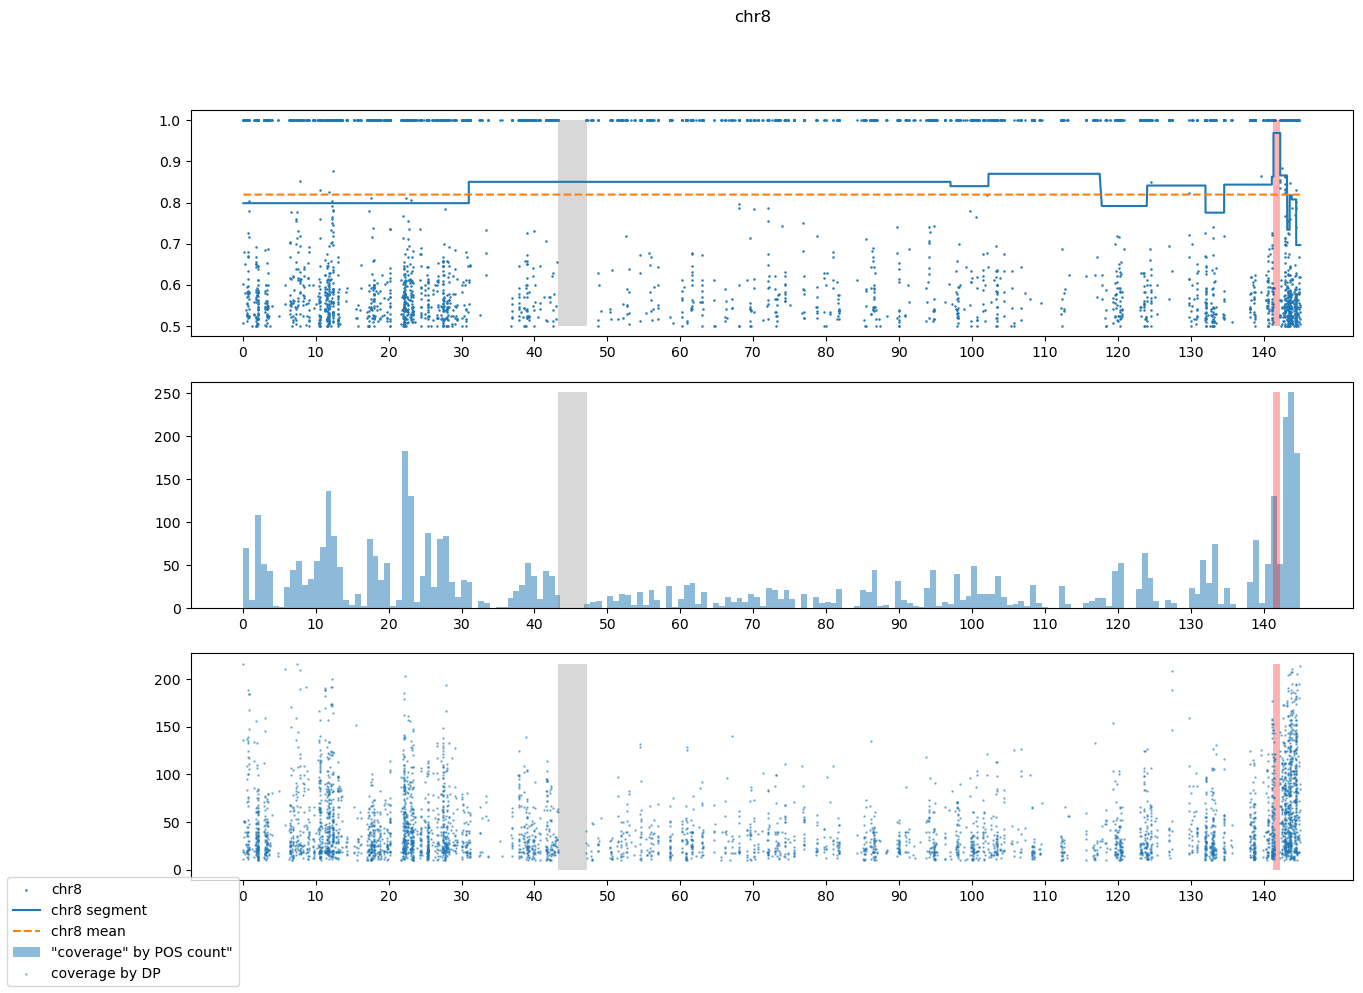

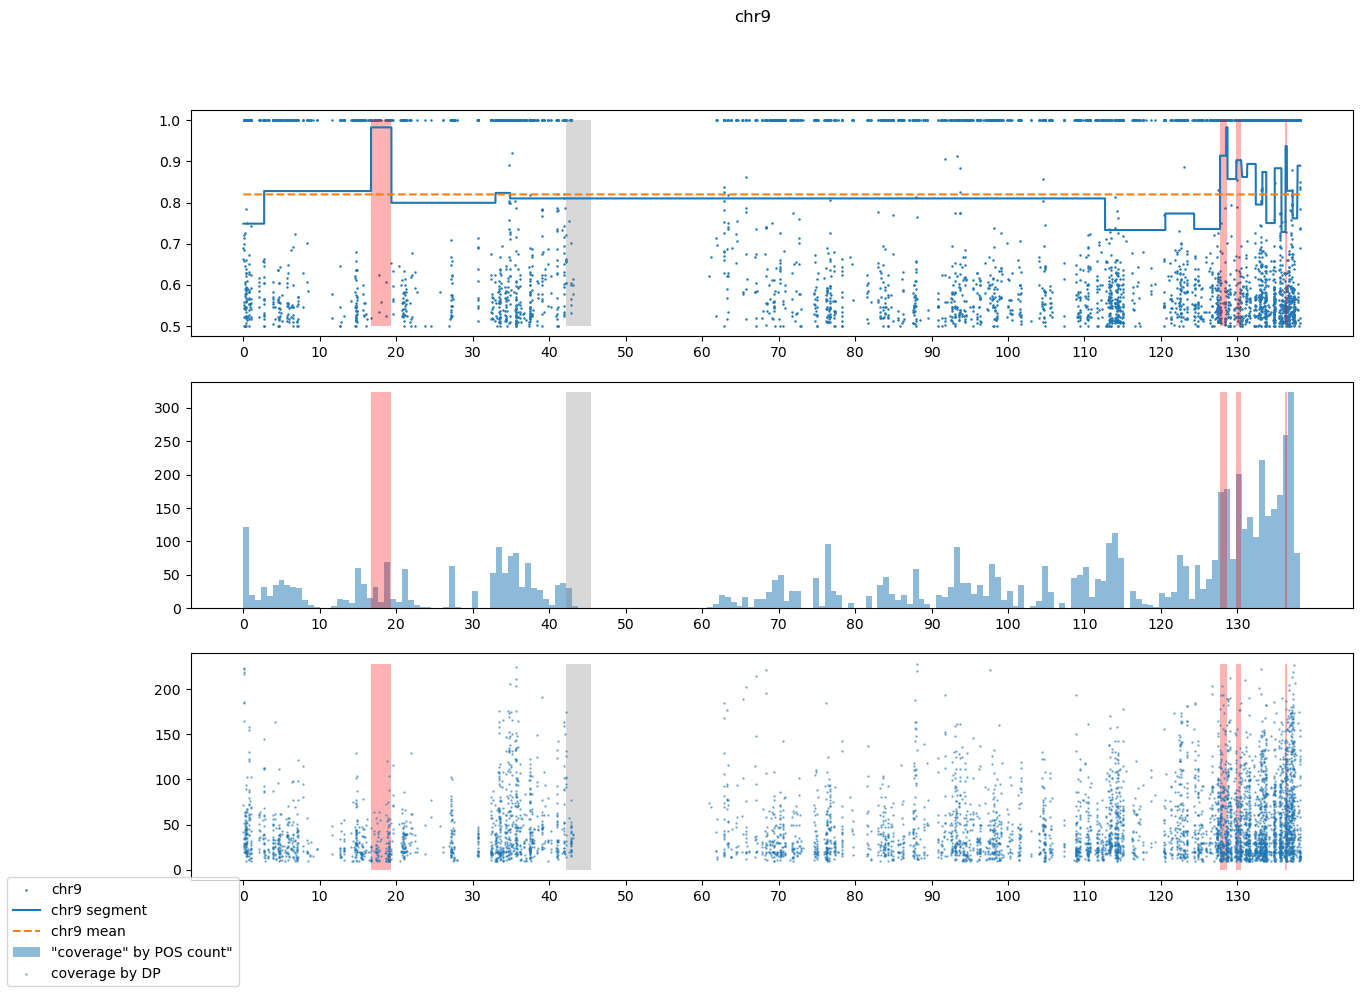

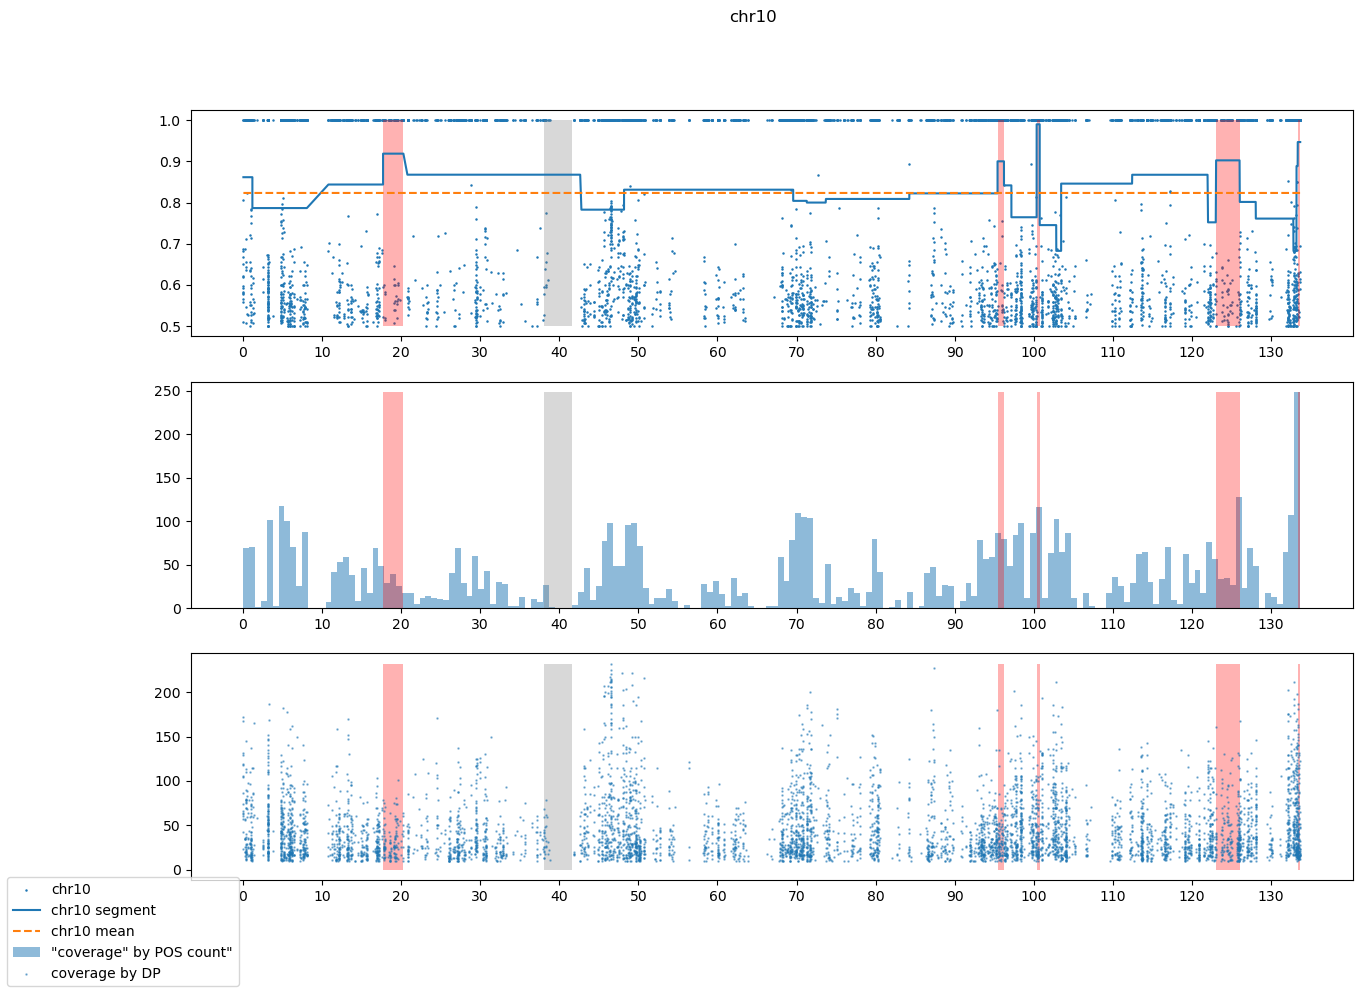

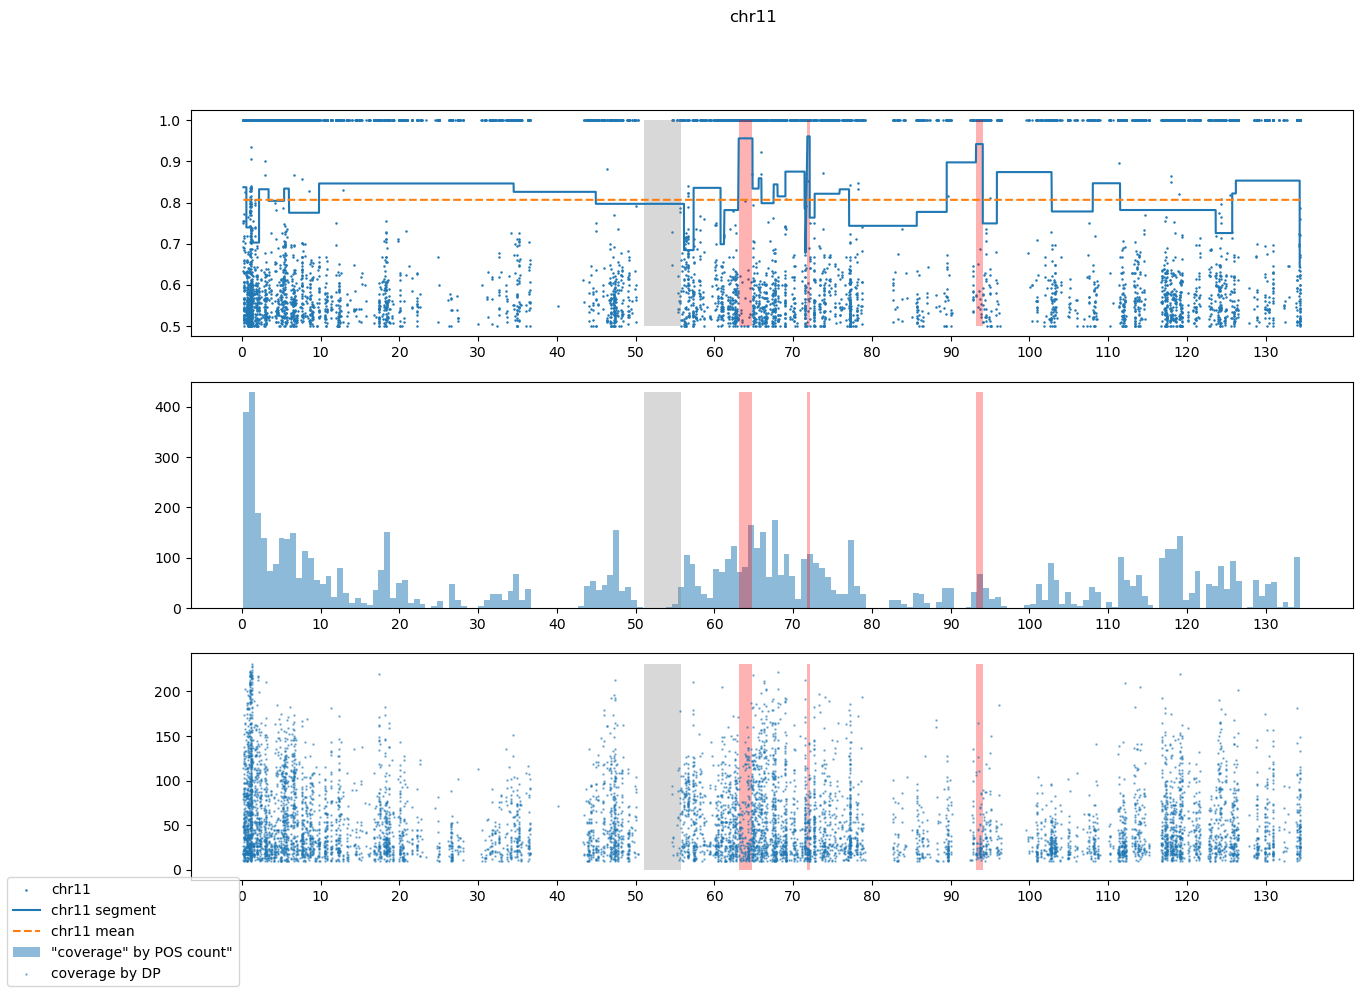

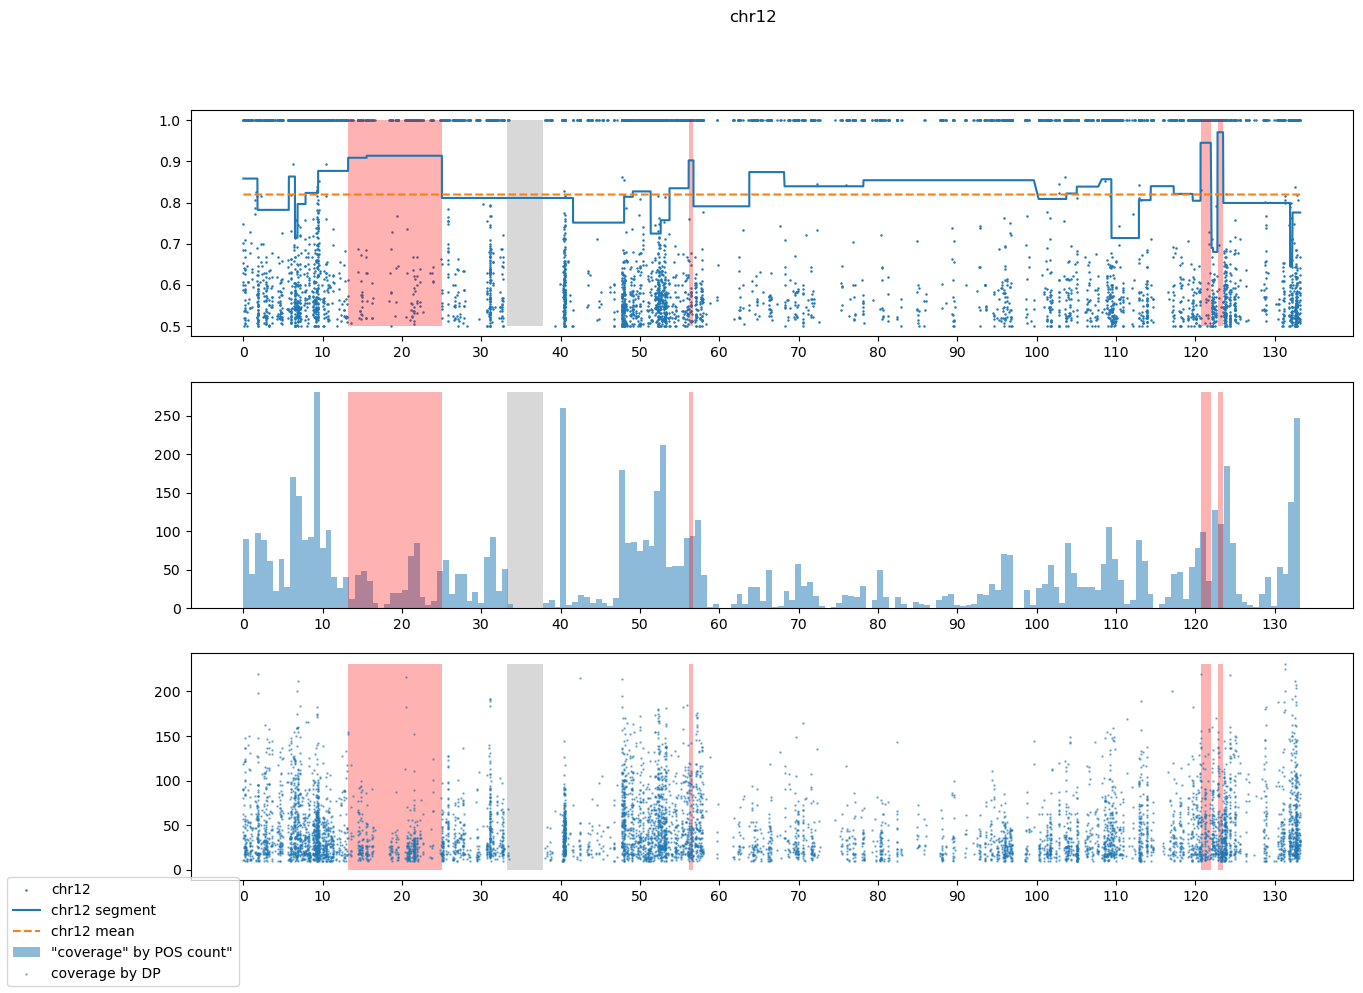

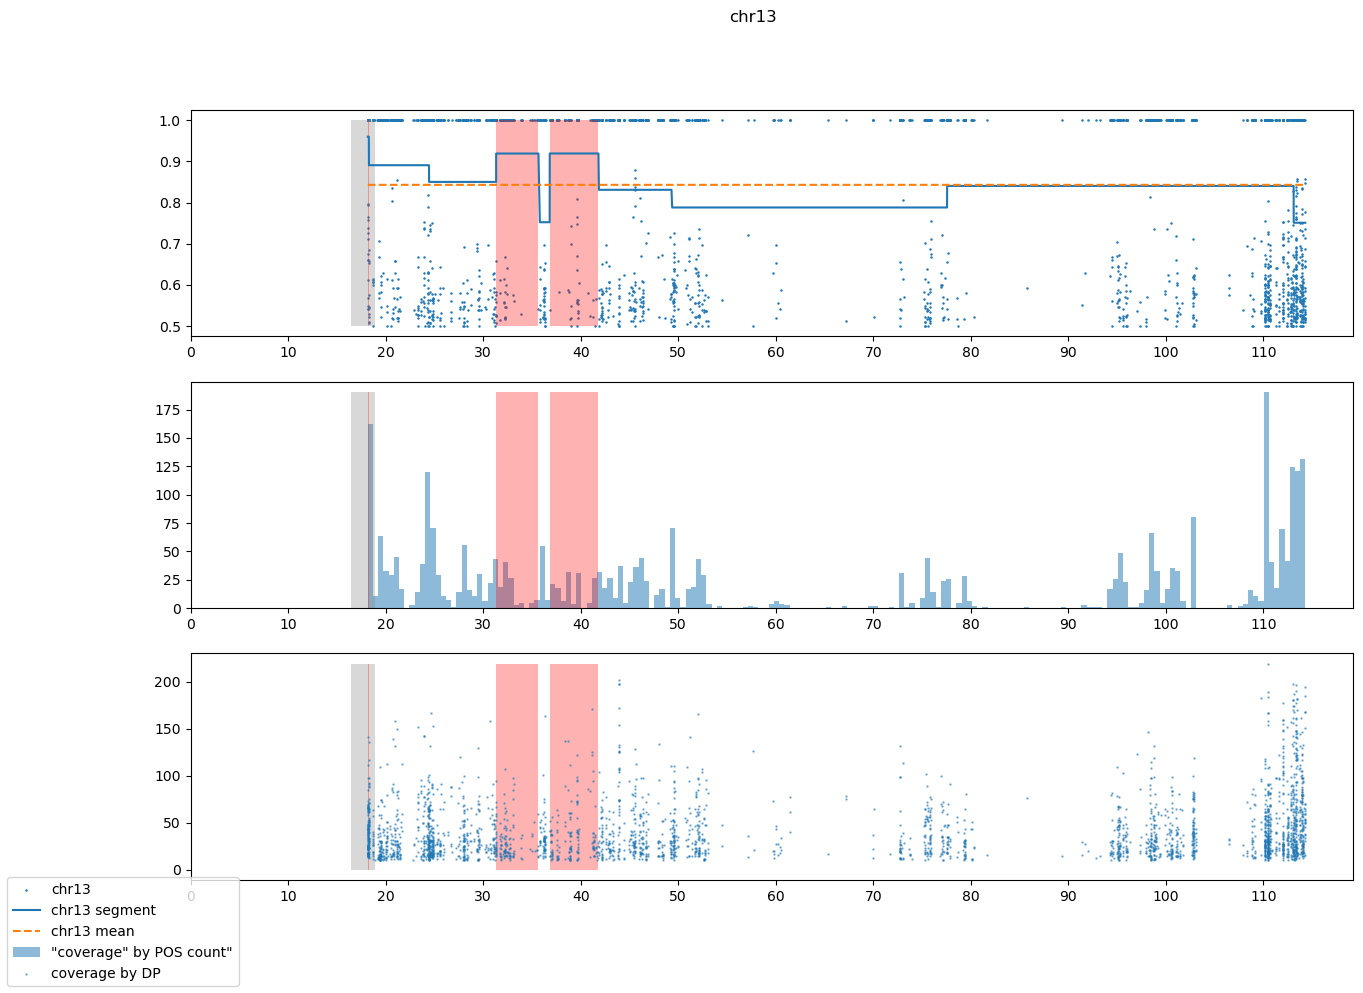

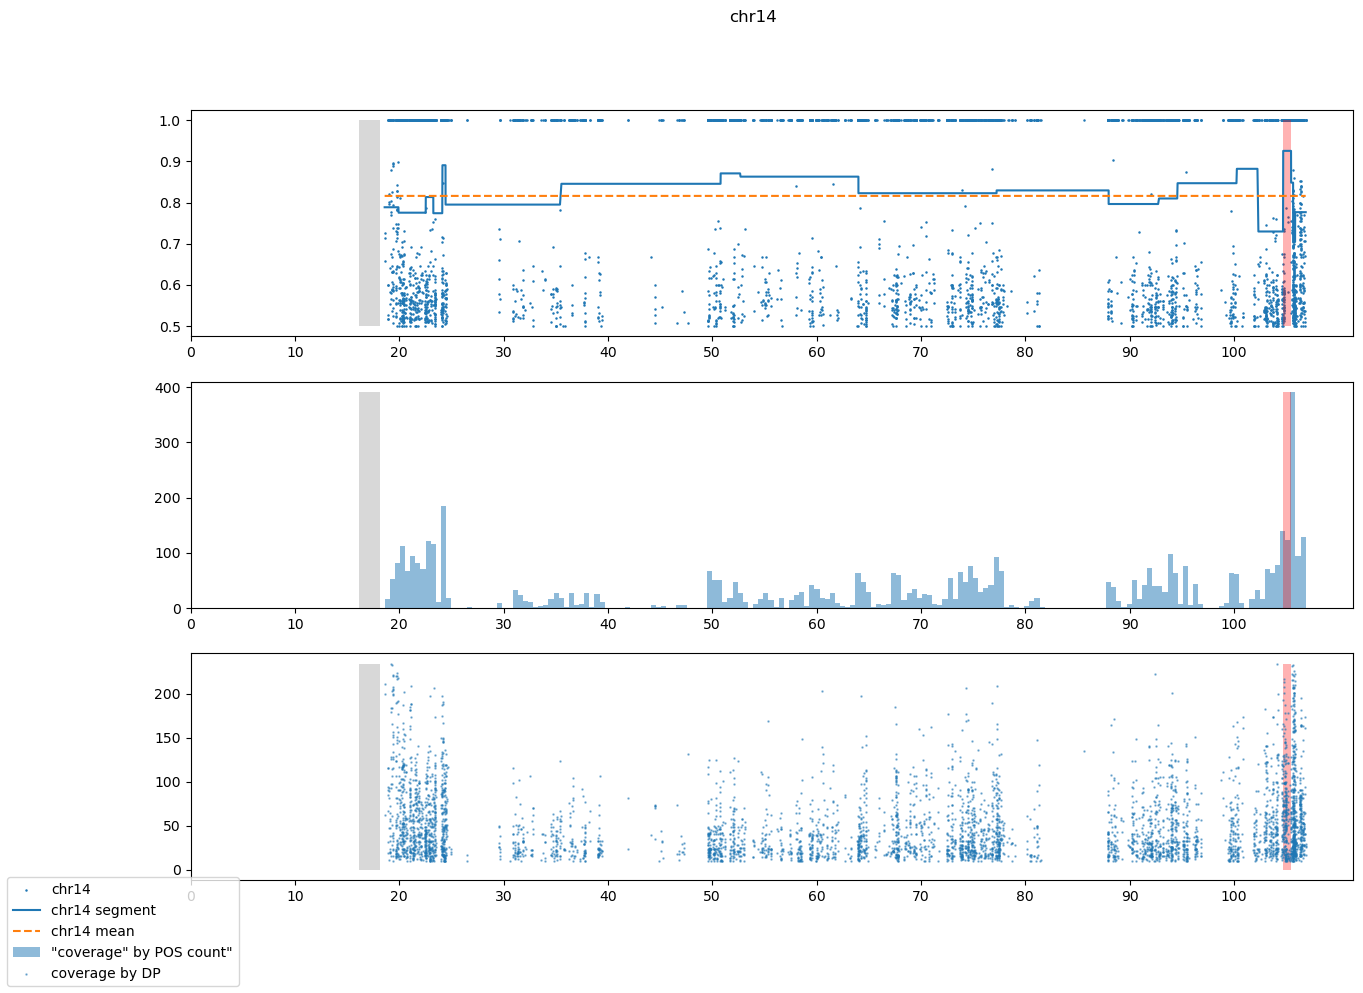

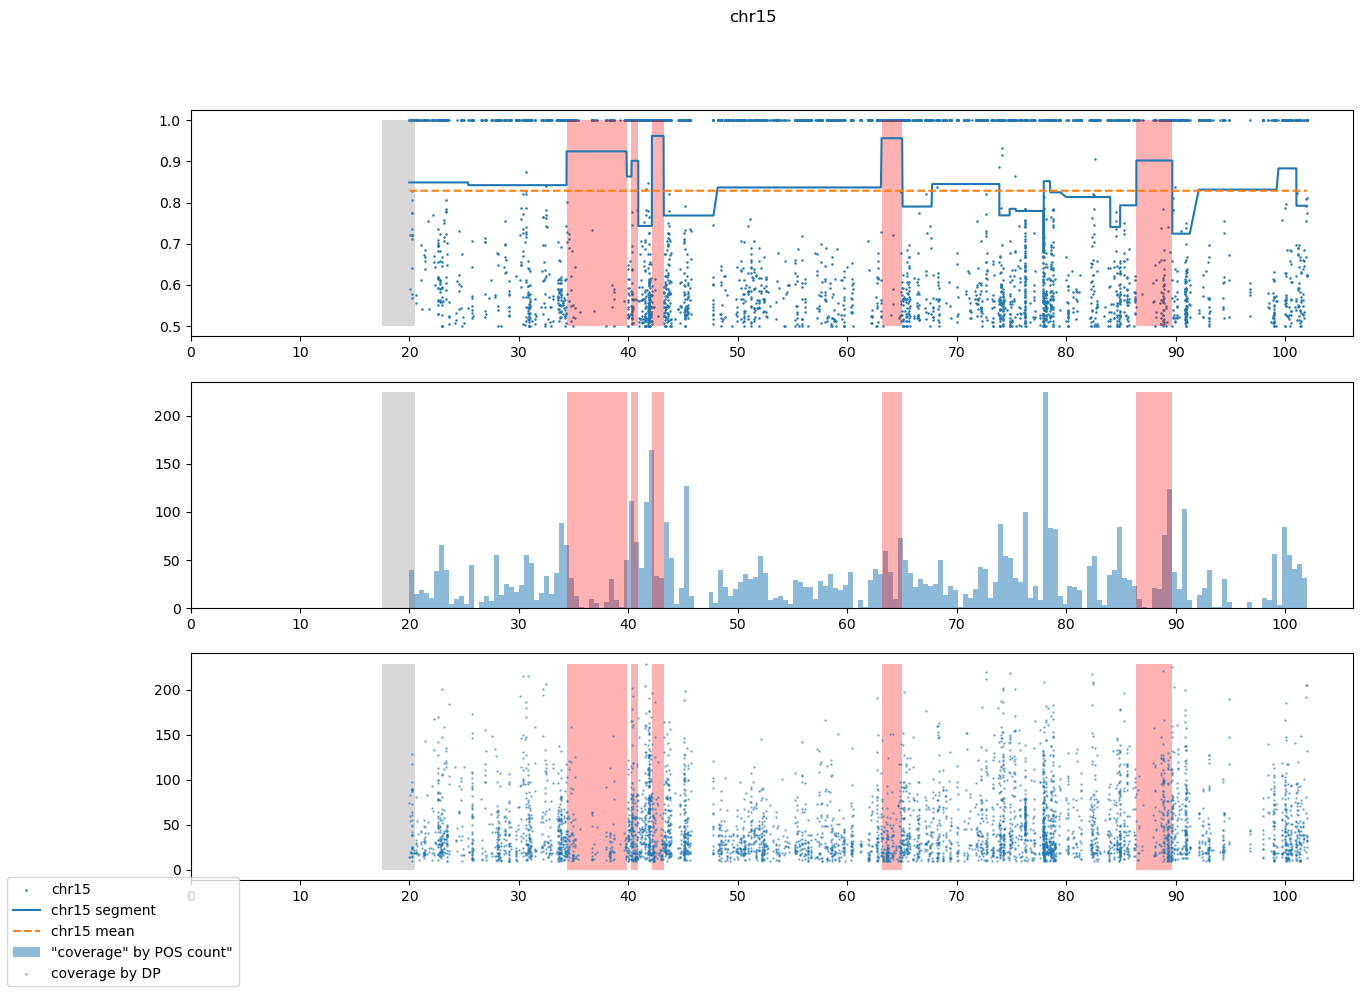

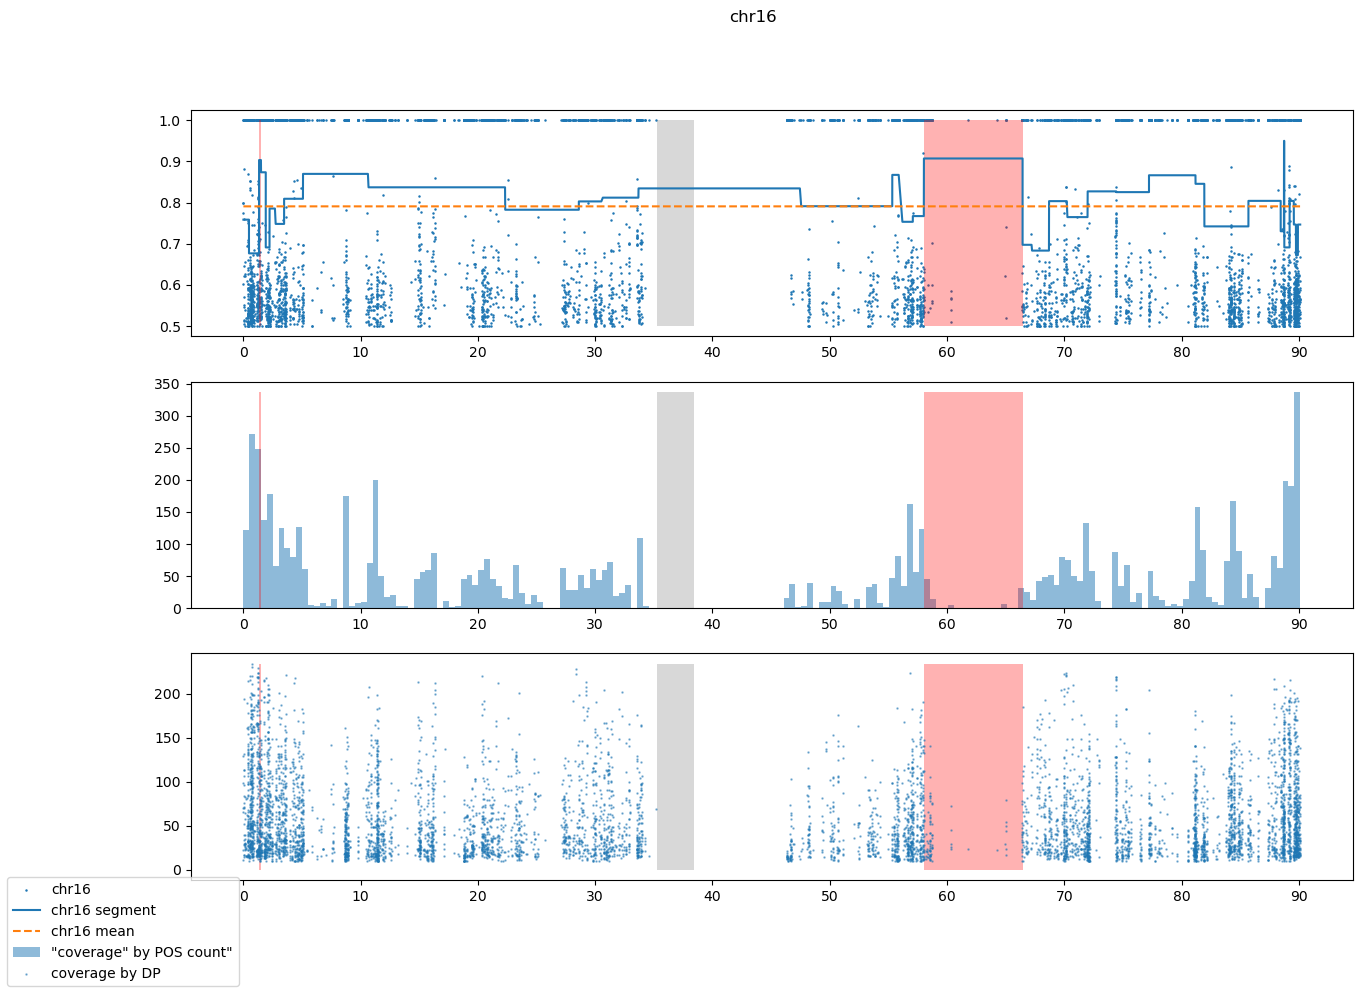

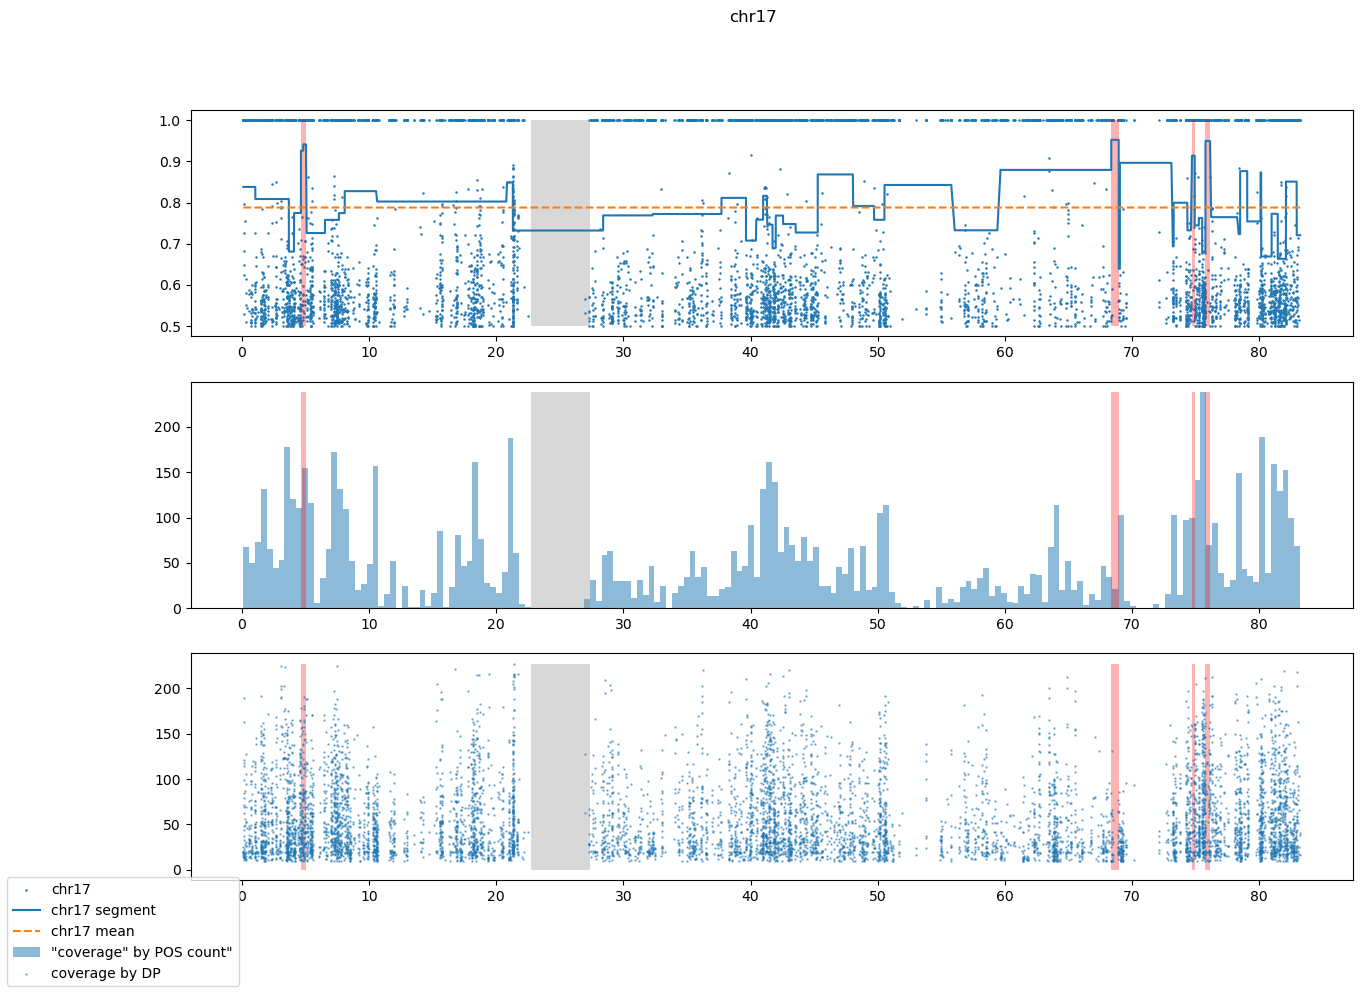

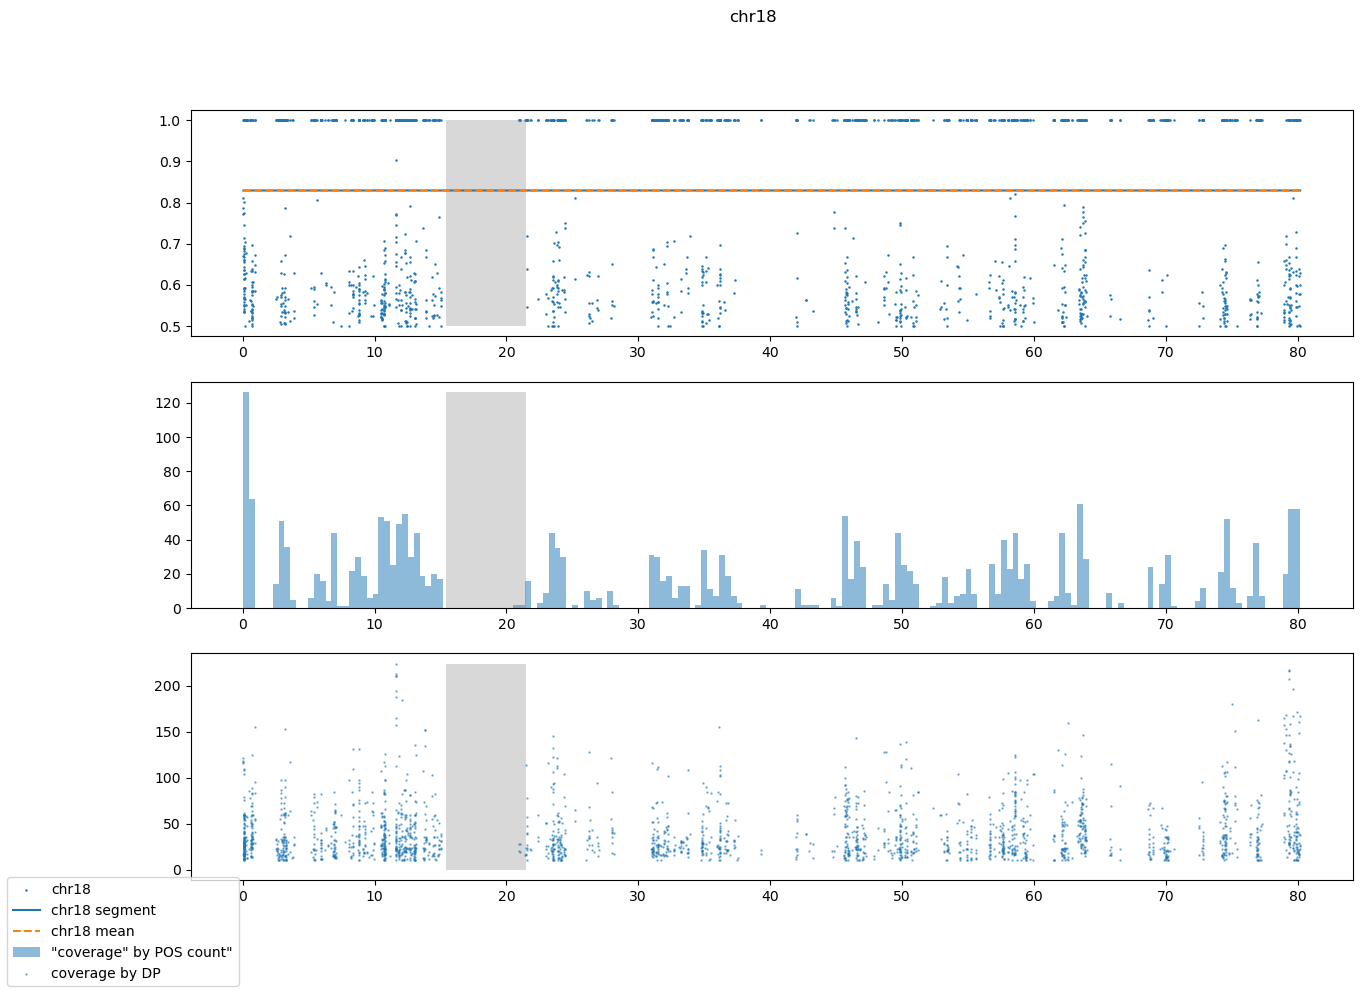

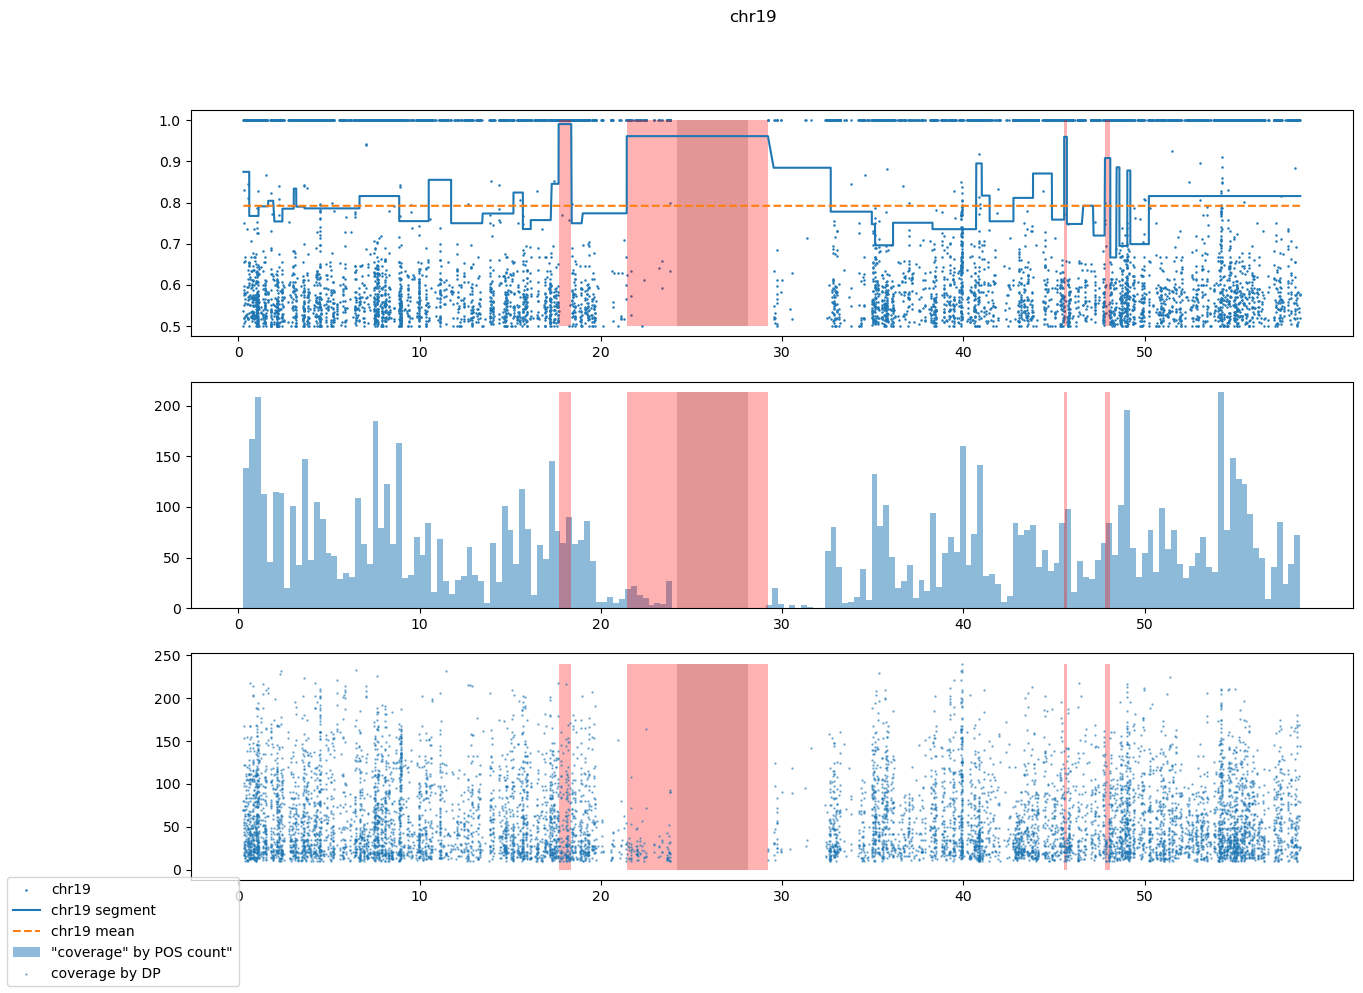

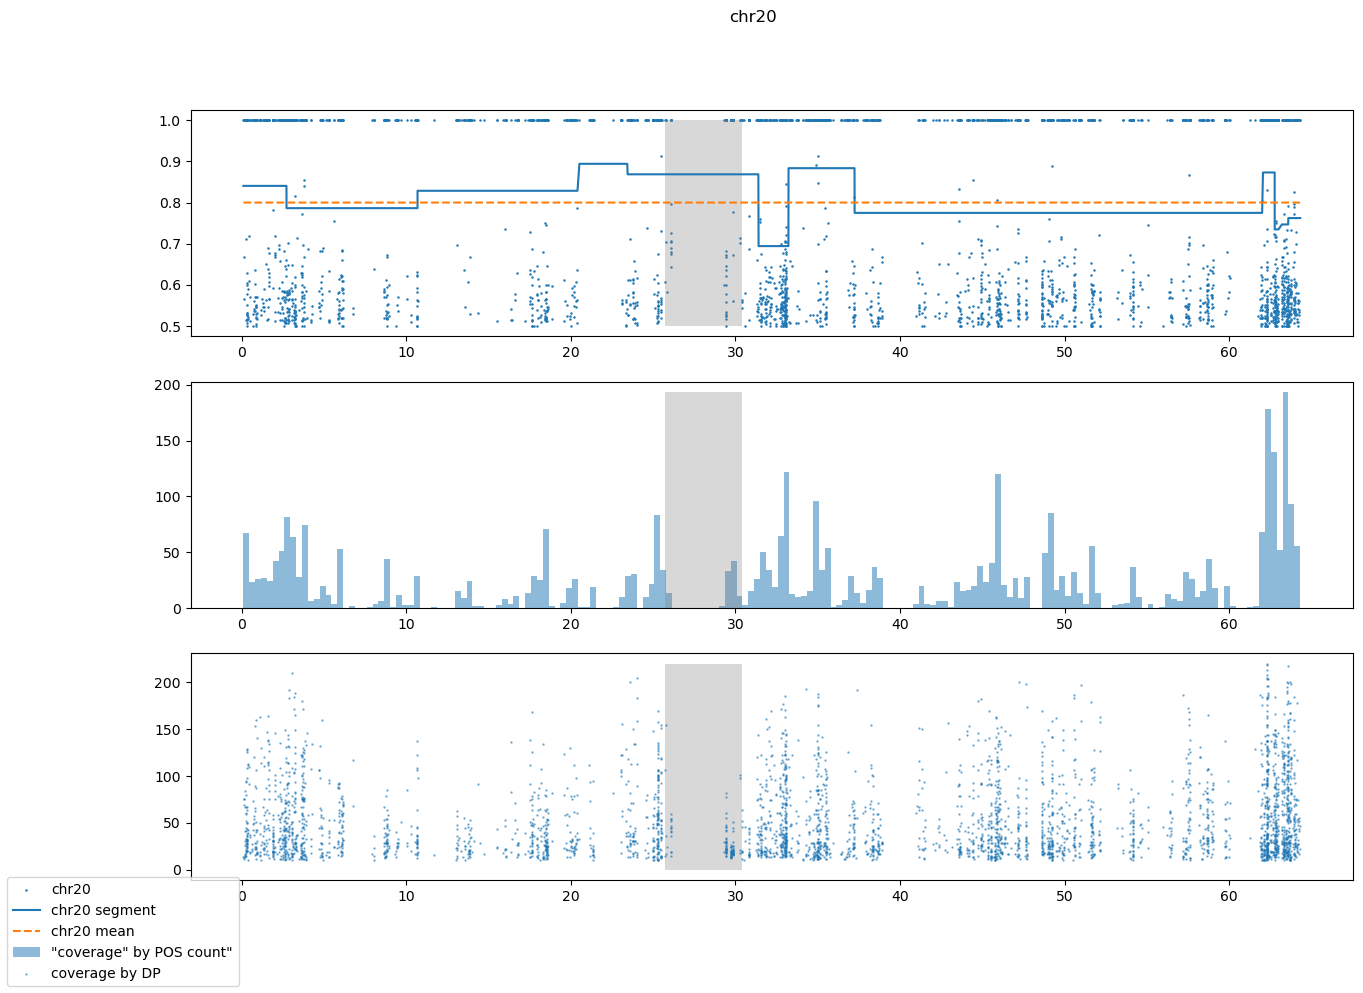

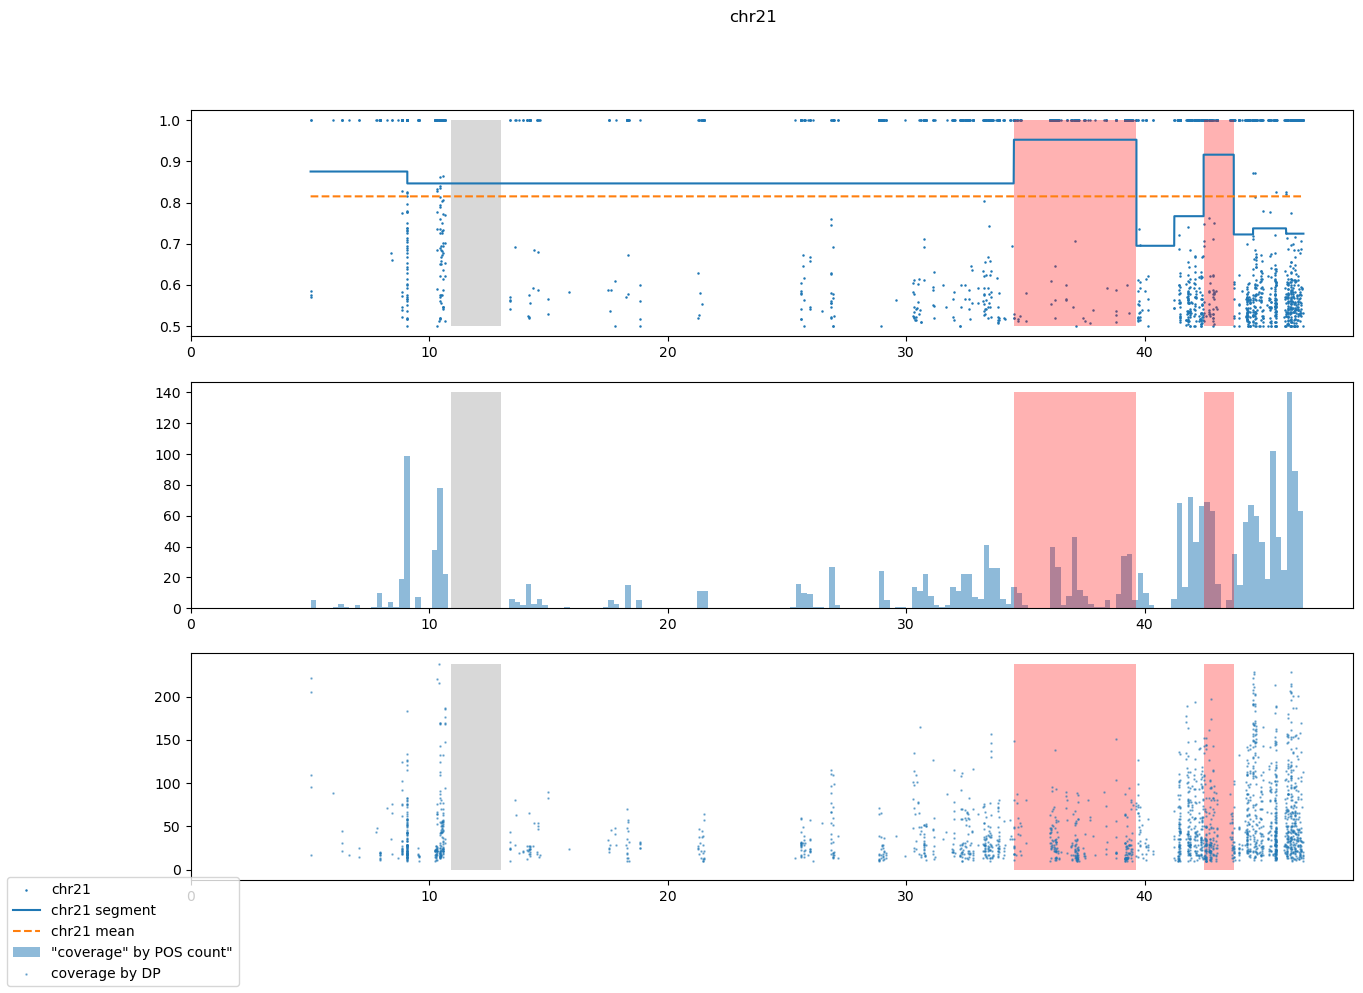

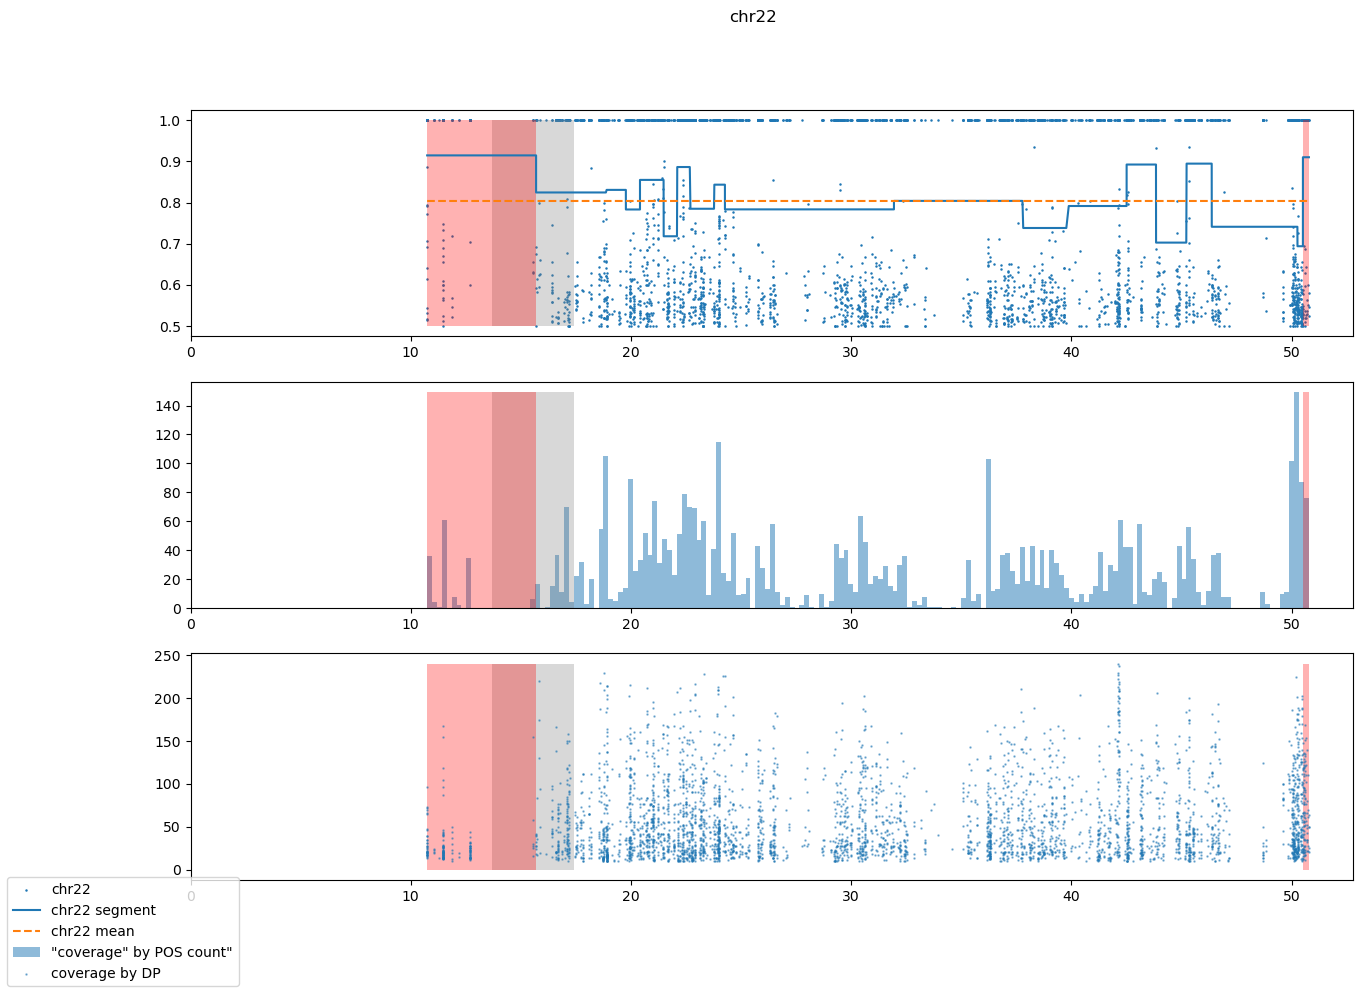

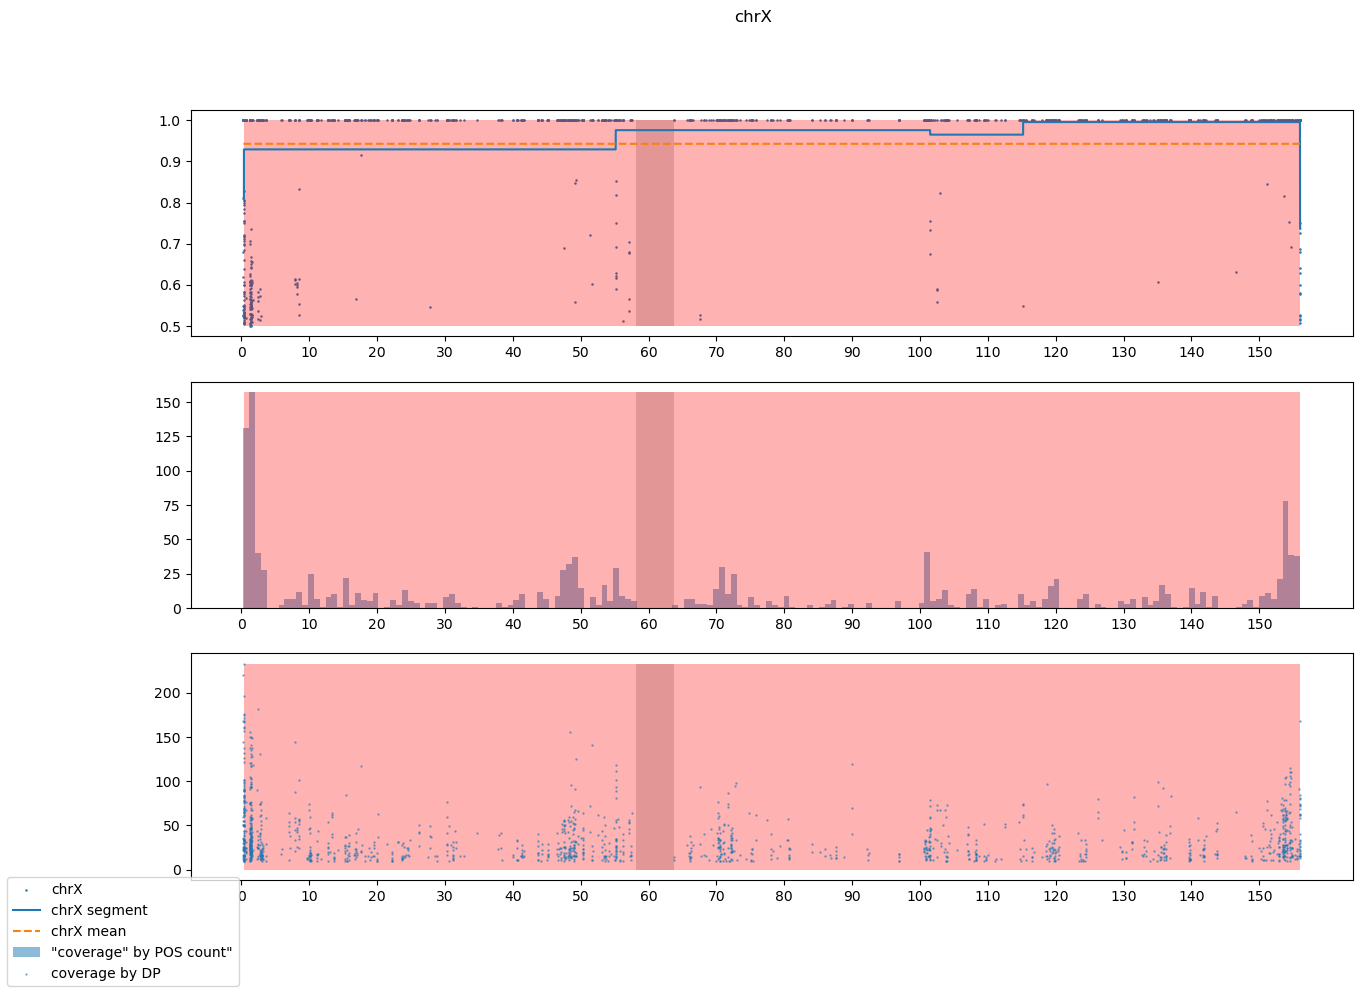

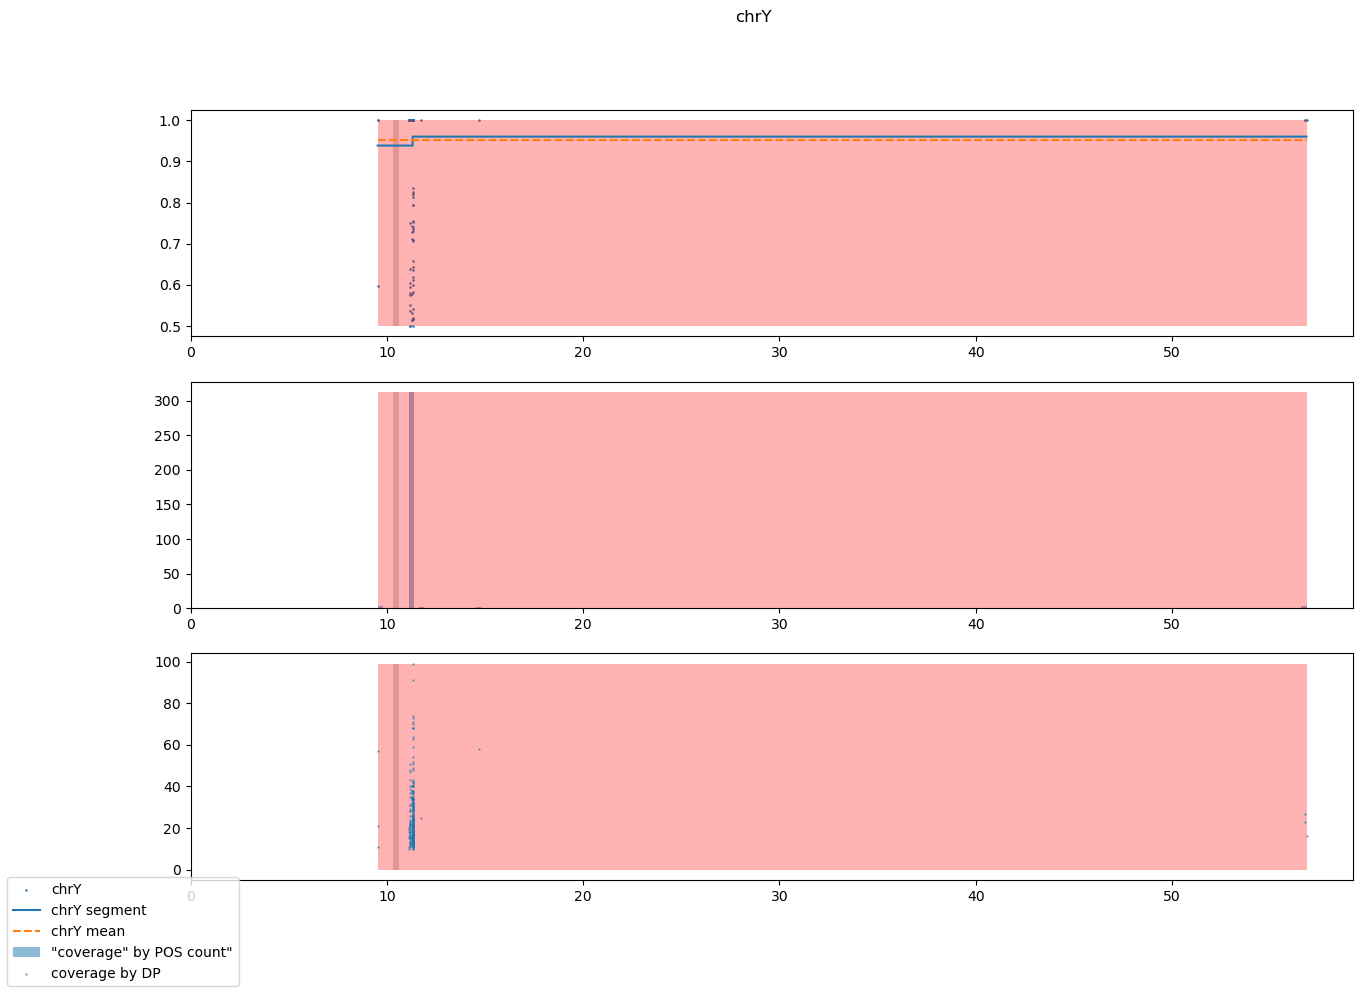

In [5]:
sample.plot_chromosomes()

In [21]:
sectors = {}

for chrom in sample.vcf['#CHROM'].unique():
    sectors[chrom] = max(sample.vcf[sample.vcf["#CHROM"] == chrom]['POS'])

In [22]:
del sectors['chrM']
sectors

{'chr1': 248914941,
 'chr2': 241900045,
 'chr3': 198167929,
 'chr4': 190179926,
 'chr5': 181234755,
 'chr6': 170720803,
 'chr7': 159058543,
 'chr8': 145026862,
 'chr9': 138217672,
 'chr10': 133689470,
 'chr11': 134382409,
 'chr12': 133221063,
 'chr13': 114299067,
 'chr14': 106874951,
 'chr15': 101976289,
 'chr16': 90104403,
 'chr17': 83212787,
 'chr18': 80202638,
 'chr19': 58572814,
 'chr20': 64328010,
 'chr21': 46662009,
 'chr22': 50782510,
 'chrX': 156025116,
 'chrY': 56855457}

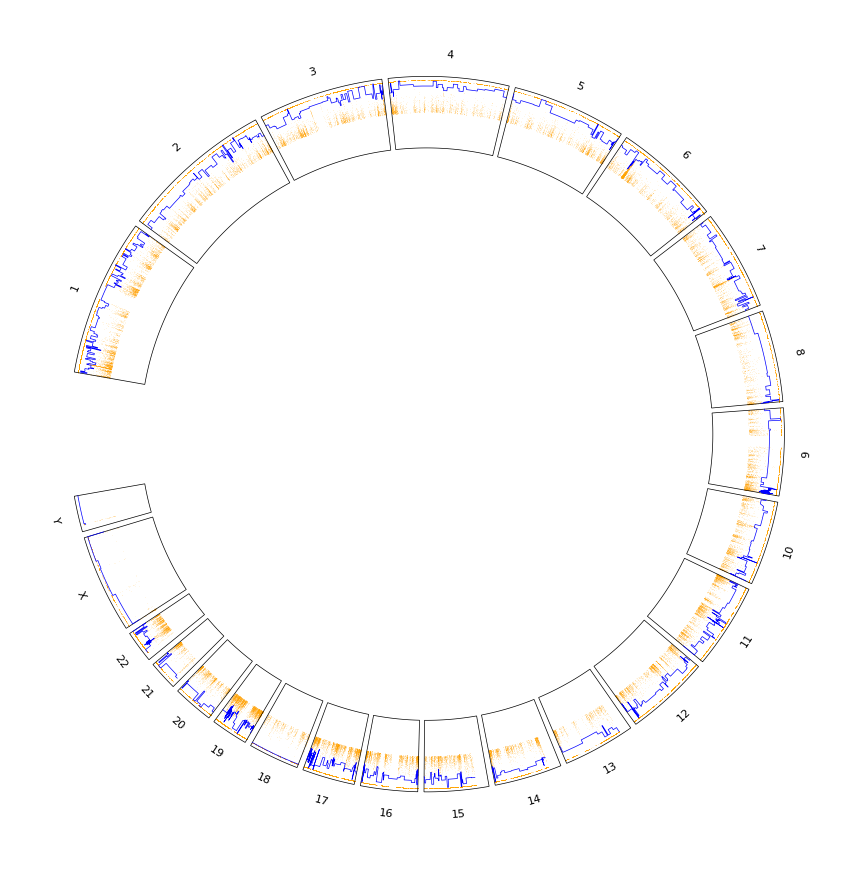

In [43]:
from pycirclize import Circos

circos = Circos(
    sectors,
    space=1,
    start=-80,
    end=260,
    endspace=False
)

for sector in circos.sectors:
    sector.axis(lw = 0)
    sector.text(f"{sector.name.replace("chr", "")}", size=8)

    track1 = sector.add_track((80, 100), r_pad_ratio=0.1)
    track1.axis()
    
    track1.scatter((sample.vcf[sample.vcf["#CHROM"] == sector.name]["POS"]).to_numpy(), (sample.vcf[sample.vcf["#CHROM"] == sector.name]["BAF"]).to_numpy(), s=0.1, color="orange", alpha=0.3) 
    track1.line((sample.vcf[sample.vcf["#CHROM"] == sector.name]["POS"]).to_numpy(), (sample.vcf[sample.vcf["#CHROM"] == sector.name]["BAF_segment"]).to_numpy(), color="blue")
    #track2 = sector.add_track((70, 90), r_pad_ratio=0.1)
    #track2.axis()
    #track2.scatter((sample.vcf[sample.vcf["#CHROM"] == sector.name]["POS"]).to_numpy(), (sample.vcf[sample.vcf["#CHROM"] == sector.name]["BAF"]).to_numpy(), s=0.3, color="blue")

fig = circos.plotfig()

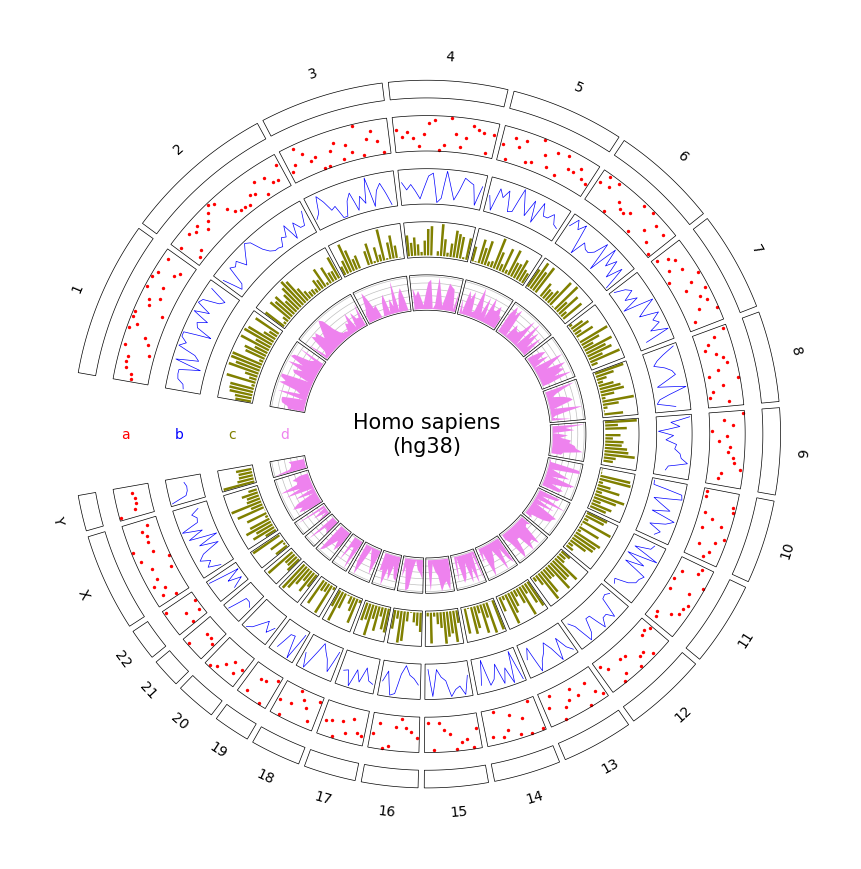

In [ ]:
from pycirclize import Circos
from pycirclize.utils import ColorCycler, load_eukaryote_example_dataset
import numpy as np

np.random.seed(0)

# Load hg38 dataset (https://github.com/moshi4/pycirclize-data/tree/main/eukaryote/hg38)
chr_bed_file = load_eukaryote_example_dataset("hg38")[0]

# Initialize Circos from BED chromosomes
circos = Circos.initialize_from_bed(
    chr_bed_file, start=-80, end=260, space=1, endspace=False
)
circos.text("Homo sapiens\n(hg38)", size=15)

# Create chromosome color dict
ColorCycler.set_cmap("gist_rainbow")
chr_names = [s.name for s in circos.sectors]
colors = ColorCycler.get_color_list(len(chr_names))
chr_name2color = {name: color for name, color in zip(chr_names, colors)}

for sector in circos.sectors:
    # Plot chromosome outer track
    sector.text(sector.name.replace("chr", ""))
    color = chr_name2color[sector.name]
    outer_track = sector.add_track((95, 100))
    #outer_track.scatter(x, y, s=6, color="red")
    outer_track.axis()
    # Create example x,y plot data
    step = 10000000
    x = np.arange(sector.start + (step / 2), sector.end - (step / 2), step)
    y = np.random.randint(0, 100, size=len(x))
    # Scatter track
    track1 = sector.add_track((80, 90), r_pad_ratio=0.1)
    track1.axis()
    track1.scatter(x, y, s=6, color="red")
    # Line track
    track2 = sector.add_track((65, 75), r_pad_ratio=0.1)
    track2.axis()
    track2.line(x, y, color="blue")
    # Bar track
    track3 = sector.add_track((50, 60), r_pad_ratio=0.1)
    track3.axis()
    track3.bar(x, y, width=step * 0.7, color="olive")
    # Fill between track
    track4 = sector.add_track((35, 45), r_pad_ratio=0.1)
    track4.axis()
    track4.grid()
    track4.fill_between(x, y, color="violet")
    # Plot track labels
    if sector.name == circos.sectors[0].name:
        # circos.text("Chr", r=outer_track.r_center, deg=-90)
        circos.text("a", r=track1.r_center, deg=-90, color="red")
        circos.text("b", r=track2.r_center, deg=-90, color="blue")
        circos.text("c", r=track3.r_center, deg=-90, color="olive")
        circos.text("d", r=track4.r_center, deg=-90, color="violet")

fig = circos.plotfig()